In [446]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from matplotlib.dates import date2num


# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [445]:
conda install -c anaconda py-xgboost

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\mussa.yousef\Anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:


    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  anaconda
    conda-4.10.3               |   py38haa95532_0         2.9 MB
    libxgboost-1.3.3           |       hd77b12b_0         1.3 MB
    py-xgboost-1.3.3           |   py38haa95532_0         139 KB
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/win-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/win-64::libxgboost-1.3.3-hd77b12b_0
  py-xgboost         pkgs/main/win-64::py-xgbo

# Stock Data July 13th TEST/EXAMPLE

In [4]:
Test=pd.read_csv('FULL STOCK REPORT 2021-07-13.csv',delimiter=',')



#''.../Documents/StockFiles - 13072021-13102021/StockProcessing/FULL STOCK REPORT 2021-07-13'


In [72]:
Test=pd.read_csv('FULL STOCK REPORT 2021-07-13.csv')

In [73]:
Test.head()

,SKU,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Locked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Product_Code,Product_Description,Cost_Price
0,505097736986,0,0,0,0,0,0,1,0,1,0,0,0,1,11295,SLIM LEATHER HANDLE UMBRELLA B,18.68
1,505097539247,0,81,0,0,44,0,77,0,77,63,0,0,77,15428,REGULAR DC TWILL WHITE,7.56
2,505097731040,0,0,0,0,0,0,0,0,0,1,0,0,0,10373,MENS SUIT JACKET EOR,48.55
3,505097731023,0,0,0,0,0,0,1,0,1,0,0,0,1,10373,MENS SUIT JACKET EOR,48.55
4,505097738541,0,0,0,0,0,0,4,0,4,0,0,0,4,13505,R026 POWDC CHECK STRIPE 3,6.12


Lets now upload full work flow

In [333]:
July13=pd.read_csv ('FULL STOCK REPORT 2021-07-13.csv',delimiter=',')


is_51412 =  July13['Product_Code']=='51412'
July13_51412 = July13[is_51412]
print(July13_51412.shape)
July13Pre=July13_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July13Pre.fillna(0)
July13Post=July13Pre.agg(['sum'])
July13Post['Date'] = '20210713'
#July13Post['Date'] = pd.to_datetime(July13Post['Date'])

(18, 17)


In [334]:
July13Post

,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Date
sum,0.0,268.0,0.0,0.0,233.0,0.0,3345.0,-1.0,3351.0,1.0,4.0,3346.0,6.83,20210713


In [335]:
July13Post.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, sum to sum
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Peterborough                 1 non-null      float64
 1   Sherburn_Putaway             1 non-null      float64
 2   Northampton_Locked           1 non-null      float64
 3   Sherburn_Prominent           1 non-null      float64
 4   Sherburn_Unreceipted         1 non-null      float64
 5   Sherburn_Hanging             1 non-null      float64
 6   Northamton_Pickface          1 non-null      float64
 7   CIMS_vs_Clipper_Allocatable  1 non-null      float64
 8   ISM_Unlocked                 1 non-null      float64
 9   ISM_Allocated                1 non-null      float64
 10  ISM_Unshipped                1 non-null      float64
 11  ISM_Allocatable              1 non-null      float64
 12  Cost_Price                   1 non-null      float64
 13  Date                     

In [126]:
July13_51412

,SKU,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Locked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Product_Code,Product_Description,Cost_Price
3431,505336724000,0,24,0,0,25,0,107,0,107,22,0,0,107,51412,FITTED SC TWILL WHITE,6.83
3462,505336724008,0,0,0,0,0,0,226,0,226,0,0,0,226,51412,FITTED SC TWILL WHITE,6.83
3463,505336724009,0,1,0,0,0,0,217,0,217,1,0,0,217,51412,FITTED SC TWILL WHITE,6.83
3605,505336723991,0,0,0,0,0,0,1,0,1,0,0,0,1,51412,FITTED SC TWILL WHITE,6.83
3606,505336723995,0,13,0,0,25,0,146,0,146,13,0,0,146,51412,FITTED SC TWILL WHITE,6.83
3607,505336723998,0,0,0,0,0,0,418,0,419,0,1,0,418,51412,FITTED SC TWILL WHITE,6.83
3642,505336723989,0,0,0,0,0,0,14,0,14,0,0,0,14,51412,FITTED SC TWILL WHITE,6.83
3643,505336723996,0,18,0,0,8,0,324,0,324,18,0,0,324,51412,FITTED SC TWILL WHITE,6.83
3677,505336724001,0,9,0,0,0,0,0,0,0,9,0,0,0,51412,FITTED SC TWILL WHITE,6.83
3678,505336724010,0,-1,0,0,2,0,144,0,144,0,0,0,144,51412,FITTED SC TWILL WHITE,6.83




-  Import Data between 13th July - 29th September // 
-  Filter "White Twill Fitted Button Cuff Shirt" - 51412 // 
-  Aggregate Stock data // 
-  Add Date Column to use to join with GA DATA

In [310]:
#July
July13=pd.read_csv ('FULL STOCK REPORT 2021-07-13.csv',delimiter=',')

is_51412 =  July13['Product_Code']=='51412'
July13_51412 = July13[is_51412]
print(July13_51412.shape)
July13Pre=July13_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July13Pre.fillna(0)
July13Post=July13Pre.agg(['sum'])
July13Post['Date'] = '20210713'
July13Post['Date'] = pd.to_datetime(July13Post['Date'])
#July13Post.reset_index()

July14=pd.read_csv ('FULL STOCK REPORT 2021-07-14.csv',delimiter=',')

is_51412 =  July14['Product_Code']=='51412'
July14_51412 = July14[is_51412]
print(July14_51412.shape)
July14Pre=July14_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July14Pre.fillna(0)
July14Post=July14Pre.agg(['sum'])
July14Post['Date'] = '20210714'
July14Post['Date'] = pd.to_datetime(July14Post['Date'])
#July14Post.reset_index()




July15=pd.read_csv ('FULL STOCK REPORT 2021-07-15.csv',delimiter=',')

is_51412 =  July15['Product_Code']=='51412'
July15_51412 = July15[is_51412]
print(July15_51412.shape)
July15Pre=July15_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July15Pre.fillna(0)
July15Post=July15Pre.agg(['sum'])
July15Post['Date'] = '20210715'
July15Post['Date'] = pd.to_datetime(July15Post['Date'])
#July15Post.reset_index()





July16=pd.read_csv ('FULL STOCK REPORT 2021-07-16.csv',delimiter=',')

is_51412 =  July16['Product_Code']=='51412'
July16_51412 = July16[is_51412]
print(July16_51412.shape)
July16Pre=July16_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July16Pre.fillna(0)
July16Post=July16Pre.agg(['sum'])
July16Post['Date'] = '20210716'
July16Post['Date'] = pd.to_datetime(July16Post['Date'])
#July16Post.reset_index()


July17=pd.read_csv ('FULL STOCK REPORT 2021-07-17.csv',delimiter=',')

is_51412 =  July17['Product_Code']=='51412'
July17_51412 = July17[is_51412]
print(July17_51412.shape)
July17Pre=July17_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July17Pre.fillna(0)
July17Post=July17Pre.agg(['sum'])
July17Post['Date'] = '20210717'
July17Post['Date'] = pd.to_datetime(July17Post['Date'])





July18=pd.read_csv ('FULL STOCK REPORT 2021-07-18.csv',delimiter=',')

is_51412 =  July18['Product_Code']=='51412'
July18_51412 = July18[is_51412]
print(July18_51412.shape)
July18Pre=July18_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July18Pre.fillna(0)
July18Post=July18Pre.agg(['sum'])
July18Post['Date'] = '20210718'
July18Post['Date'] = pd.to_datetime(July18Post['Date'])


July19=pd.read_csv ('FULL STOCK REPORT 2021-07-19.csv',delimiter=',')

is_51412 =  July19['Product_Code']=='51412'
July19_51412 = July19[is_51412]
print(July19_51412.shape)
July19Pre=July19_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July19Pre.fillna(0)
July19Post=July19Pre.agg(['sum'])
July19Post['Date'] = '20210719'
July19Post['Date'] = pd.to_datetime(July19Post['Date'])


July20=pd.read_csv ('FULL STOCK REPORT 2021-07-20.csv',delimiter=',')


is_51412 =  July20['Product_Code']=='51412'
July20_51412 = July20[is_51412]
print(July20_51412.shape)
July20Pre=July20_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July20Pre.fillna(0)
July20Post=July20Pre.agg(['sum'])
July20Post['Date'] = '20210720'
July20Post['Date'] = pd.to_datetime(July20Post['Date'])





July21=pd.read_csv ('FULL STOCK REPORT 2021-07-21.csv',delimiter=',')

is_51412 =  July21['Product_Code']=='51412'
July21_51412 = July21[is_51412]
print(July21_51412.shape)
July21Pre=July21_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July21Pre.fillna(0)
July21Post=July21Pre.agg(['sum'])
July21Post['Date'] = '20210721'
July21Post['Date'] = pd.to_datetime(July21Post['Date'])


July22=pd.read_csv ('FULL STOCK REPORT 2021-07-22.csv',delimiter=',')

is_51412 =  July22['Product_Code']=='51412'
July22_51412 = July22[is_51412]
print(July22_51412.shape)
July22Pre=July22_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July22Pre.fillna(0)
July22Post=July22Pre.agg(['sum'])
July22Post['Date'] = '20210722'
July22Post['Date'] = pd.to_datetime(July22Post['Date'])



July23=pd.read_csv ('FULL STOCK REPORT 2021-07-23.csv',delimiter=',')

is_51412 =  July23['Product_Code']=='51412'
July23_51412 = July23[is_51412]
print(July23_51412.shape)
July23Pre=July23_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July23Pre.fillna(0)
July23Post=July23Pre.agg(['sum'])
July23Post['Date'] = '20210723'
July23Post['Date'] = pd.to_datetime(July23Post['Date'])


July24=pd.read_csv ('FULL STOCK REPORT 2021-07-24.csv',delimiter=',')



is_51412 =  July24['Product_Code']=='51412'
July24_51412 = July24[is_51412]
print(July24_51412.shape)
July24Pre=July24_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July24Pre.fillna(0)
July24Post=July24Pre.agg(['sum'])
July24Post['Date'] = '20210724'
July24Post['Date'] = pd.to_datetime(July24Post['Date'])


July25=pd.read_csv ('FULL STOCK REPORT 2021-07-25.csv',delimiter=',')


is_51412 =  July25['Product_Code']=='51412'
July25_51412 = July25[is_51412]
print(July25_51412.shape)
July25Pre=July25_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July25Pre.fillna(0)
July25Post=July25Pre.agg(['sum'])
July25Post['Date'] = '20210725'
July25Post['Date'] = pd.to_datetime(July25Post['Date'])


July26=pd.read_csv ('FULL STOCK REPORT 2021-07-26.csv',delimiter=',')


is_51412 =  July26['Product_Code']=='51412'
July26_51412 = July26[is_51412]
print(July26_51412.shape)
July26Pre=July26_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July26Pre.fillna(0)
July26Post=July26Pre.agg(['sum'])
July26Post['Date'] = '20210726'
July26Post['Date'] = pd.to_datetime(July26Post['Date'])

July27=pd.read_csv ('FULL STOCK REPORT 2021-07-27.csv',delimiter=',')


is_51412 =  July27['Product_Code']=='51412'
July27_51412 = July27[is_51412]
print(July27_51412.shape)
July27Pre=July27_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July27Pre.fillna(0)
July27Post=July27Pre.agg(['sum'])
July27Post['Date'] = '20210727'
July27Post['Date'] = pd.to_datetime(July27Post['Date'])

July28=pd.read_csv ('FULL STOCK REPORT 2021-07-28.csv',delimiter=',')


is_51412 =  July28['Product_Code']=='51412'
July28_51412 = July28[is_51412]
print(July28_51412.shape)
July28Pre=July28_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July28Pre.fillna(0)
July28Post=July28Pre.agg(['sum'])
July28Post['Date'] = '20210728'
July28Post['Date'] = pd.to_datetime(July28Post['Date'])

July29=pd.read_csv ('FULL STOCK REPORT 2021-07-29.csv',delimiter=',')


is_51412 =  July29['Product_Code']=='51412'
July29_51412 = July29[is_51412]
print(July29_51412.shape)
July29Pre=July29_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July29Pre.fillna(0)
July29Post=July29Pre.agg(['sum'])
July29Post['Date'] = '20210729'
July29Post['Date'] = pd.to_datetime(July29Post['Date'])

July30=pd.read_csv ('FULL STOCK REPORT 2021-07-30.csv',delimiter=',')


is_51412 =  July30['Product_Code']=='51412'
July30_51412 = July30[is_51412]
print(July30_51412.shape)
July30Pre=July30_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July30Pre.fillna(0)
July30Post=July30Pre.agg(['sum'])
July30Post['Date'] = '20210730'
July30Post['Date'] = pd.to_datetime(July30Post['Date'])

July31=pd.read_csv ('FULL STOCK REPORT 2021-07-31.csv',delimiter=',')


is_51412 =  July31['Product_Code']=='51412'
July31_51412 = July31[is_51412]
print(July31_51412.shape)
July31Pre=July31_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
July31Pre.fillna(0)
July31Post=July31Pre.agg(['sum'])
July31Post['Date'] = '20210731'
July31Post['Date'] = pd.to_datetime(July31Post['Date'])


#August
Aug1=pd.read_csv ('FULL STOCK REPORT 2021-08-01.csv',delimiter=',')

is_51412 =  Aug1['Product_Code']=='51412'
Aug1_51412 = Aug1[is_51412]
print(Aug1_51412.shape)
Aug1Pre=Aug1_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug1Pre.fillna(0)
Aug1Post=Aug1Pre.agg(['sum'])
Aug1Post['Date'] = '20210801'
Aug1Post['Date'] = pd.to_datetime(Aug1Post['Date'])



Aug2=pd.read_csv ('FULL STOCK REPORT 2021-08-02.csv',delimiter=',')


is_51412 =  Aug2['Product_Code']=='51412'
Aug2_51412 = Aug2[is_51412]
print(Aug2_51412.shape)
Aug2Pre=Aug2_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug2Pre.fillna(0)
Aug2Post=Aug2Pre.agg(['sum'])
Aug2Post['Date'] = '20210802'
Aug2Post['Date'] = pd.to_datetime(Aug2Post['Date'])


Aug3=pd.read_csv ('FULL STOCK REPORT 2021-08-03.csv',delimiter=',')


is_51412 =  Aug3['Product_Code']=='51412'
Aug3_51412 = Aug3[is_51412]
print(Aug3_51412.shape)
Aug3Pre=Aug3_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug3Pre.fillna(0)
Aug3Post=Aug3Pre.agg(['sum'])
Aug3Post['Date'] = '20210803'
Aug3Post['Date'] = pd.to_datetime(Aug3Post['Date'])


Aug4=pd.read_csv ('FULL STOCK REPORT 2021-08-04.csv',delimiter=',')

is_51412 =  Aug4['Product_Code']=='51412'
Aug4_51412 = Aug4[is_51412]
print(Aug4_51412.shape)
Aug4Pre=Aug4_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug4Pre.fillna(0)
Aug4Post=Aug4Pre.agg(['sum'])
Aug4Post['Date'] = '20210804'
Aug4Post['Date'] = pd.to_datetime(Aug4Post['Date'])



Aug5=pd.read_csv ('FULL STOCK REPORT 2021-08-05.csv',delimiter=',')


is_51412 =  Aug5['Product_Code']=='51412'
Aug5_51412 = Aug5[is_51412]
print(Aug5_51412.shape)
Aug5Pre=Aug5_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug5Pre.fillna(0)
Aug5Post=Aug5Pre.agg(['sum'])
Aug5Post['Date'] = '20210805'
Aug5Post['Date'] = pd.to_datetime(Aug5Post['Date'])


Aug6=pd.read_csv ('FULL STOCK REPORT 2021-08-06.csv',delimiter=',')



is_51412 =  Aug6['Product_Code']=='51412'
Aug6_51412 = Aug6[is_51412]
print(Aug6_51412.shape)
Aug6Pre=Aug6_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug6Pre.fillna(0)
Aug6Post=Aug6Pre.agg(['sum'])
Aug6Post['Date'] = '20210806'
Aug6Post['Date'] = pd.to_datetime(Aug6Post['Date'])


Aug7=pd.read_csv ('FULL STOCK REPORT 2021-08-07.csv',delimiter=',')



is_51412 =  Aug7['Product_Code']=='51412'
Aug7_51412 = Aug7[is_51412]
print(Aug7_51412.shape)
Aug7Pre=Aug7_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug7Pre.fillna(0)
Aug7Post=Aug7Pre.agg(['sum'])
Aug7Post['Date'] = '20210807'
Aug7Post['Date'] = pd.to_datetime(Aug7Post['Date'])

Aug8=pd.read_csv ('FULL STOCK REPORT 2021-08-08.csv',delimiter=',')


is_51412 =  Aug8['Product_Code']=='51412'
Aug8_51412 = Aug8[is_51412]
print(Aug8_51412.shape)
Aug8Pre=Aug8_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug8Pre.fillna(0)
Aug8Post=Aug8Pre.agg(['sum'])
Aug8Post['Date'] = '20210808'
Aug8Post['Date'] = pd.to_datetime(Aug8Post['Date'])



Aug9=pd.read_csv ('FULL STOCK REPORT 2021-08-09.csv',delimiter=',')


is_51412 =  Aug9['Product_Code']=='51412'
Aug9_51412 = Aug9[is_51412]
print(Aug9_51412.shape)
Aug9Pre=Aug9_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug9Pre.fillna(0)
Aug9Post=Aug9Pre.agg(['sum'])
Aug9Post['Date'] = '20210809'
Aug9Post['Date'] = pd.to_datetime(Aug9Post['Date'])



Aug10=pd.read_csv ('FULL STOCK REPORT 2021-08-10.csv',delimiter=',')




is_51412 =  Aug10['Product_Code']=='51412'
Aug10_51412 = Aug10[is_51412]
print(Aug10_51412.shape)
Aug10Pre=Aug10_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug10Pre.fillna(0)
Aug10Post=Aug10Pre.agg(['sum'])
Aug10Post['Date'] = '20210810'
Aug10Post['Date'] = pd.to_datetime(Aug10Post['Date'])


Aug11=pd.read_csv ('FULL STOCK REPORT 2021-08-11.csv',delimiter=',')




is_51412 =  Aug11['Product_Code']=='51412'
Aug11_51412 = Aug11[is_51412]
print(Aug11_51412.shape)
Aug11Pre=Aug11_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug11Pre.fillna(0)
Aug11Post=Aug11Pre.agg(['sum'])
Aug11Post['Date'] = '20210811'
Aug11Post['Date'] = pd.to_datetime(Aug11Post['Date'])


Aug12=pd.read_csv ('FULL STOCK REPORT 2021-08-12.csv',delimiter=',')



is_51412 =  Aug12['Product_Code']=='51412'
Aug12_51412 = Aug12[is_51412]
print(Aug12_51412.shape)
Aug12Pre=Aug12_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug12Pre.fillna(0)
Aug12Post=Aug12Pre.agg(['sum'])
Aug12Post['Date'] = '20210812'
Aug12Post['Date'] = pd.to_datetime(Aug12Post['Date'])



Aug13=pd.read_csv ('FULL STOCK REPORT 2021-08-13.csv',delimiter=',')




is_51412 =  Aug13['Product_Code']=='51412'
Aug13_51412 = Aug13[is_51412]
print(Aug13_51412.shape)
Aug13Pre=Aug13_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug13Pre.fillna(0)
Aug13Post=Aug13Pre.agg(['sum'])
Aug13Post['Date'] = '20210813'
Aug13Post['Date'] = pd.to_datetime(Aug13Post['Date'])



Aug14=pd.read_csv ('FULL STOCK REPORT 2021-08-14.csv',delimiter=',')



is_51412 =  Aug14['Product_Code']=='51412'
Aug14_51412 = Aug14[is_51412]
print(Aug14_51412.shape)
Aug14Pre=Aug14_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug14Pre.fillna(0)
Aug14Post=Aug4Pre.agg(['sum'])
Aug14Post['Date'] = '20210814'
Aug14Post['Date'] = pd.to_datetime(Aug14Post['Date'])



Aug15=pd.read_csv ('FULL STOCK REPORT 2021-08-15.csv',delimiter=',')



is_51412 =  Aug15['Product_Code']=='51412'
Aug15_51412 = Aug15[is_51412]
print(Aug15_51412.shape)
Aug15Pre=Aug15_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug15Pre.fillna(0)
Aug15Post=Aug15Pre.agg(['sum'])
Aug15Post['Date'] = '20210815'
Aug15Post['Date'] = pd.to_datetime(Aug15Post['Date'])



Aug16=pd.read_csv ('FULL STOCK REPORT 2021-08-16.csv',delimiter=',')



is_51412 =  Aug16['Product_Code']=='51412'
Aug16_51412 = Aug16[is_51412]
print(Aug16_51412.shape)
Aug16Pre=Aug16_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug16Pre.fillna(0)
Aug16Post=Aug16Pre.agg(['sum'])
Aug16Post['Date'] = '20210816'
Aug16Post['Date'] = pd.to_datetime(Aug16Post['Date'])



Aug17=pd.read_csv ('FULL STOCK REPORT 2021-08-17.csv',delimiter=',')



is_51412 =  Aug17['Product_Code']=='51412'
Aug17_51412 = Aug17[is_51412]
print(Aug17_51412.shape)
Aug17Pre=Aug17_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug17Pre.fillna(0)
Aug17Post=Aug17Pre.agg(['sum'])
Aug17Post['Date'] = '20210817'
Aug17Post['Date'] = pd.to_datetime(Aug17Post['Date'])



Aug18=pd.read_csv ('FULL STOCK REPORT 2021-08-18.csv',delimiter=',')



is_51412 =  Aug18['Product_Code']=='51412'
Aug18_51412 = Aug18[is_51412]
print(Aug18_51412.shape)
Aug18Pre=Aug18_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug18Pre.fillna(0)
Aug18Post=Aug18Pre.agg(['sum'])
Aug18Post['Date'] = '20210818'
Aug18Post['Date'] = pd.to_datetime(Aug18Post['Date'])



Aug19=pd.read_csv ('FULL STOCK REPORT 2021-08-19.csv',delimiter=',')


is_51412 =  Aug19['Product_Code']=='51412'
Aug19_51412 = Aug19[is_51412]
print(Aug19_51412.shape)
Aug19Pre=Aug19_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug19Pre.fillna(0)
Aug19Post=Aug19Pre.agg(['sum'])
Aug19Post['Date'] = '20210819'
Aug19Post['Date'] = pd.to_datetime(Aug19Post['Date'])




Aug20=pd.read_csv ('FULL STOCK REPORT 2021-08-20.csv',delimiter=',')


is_51412 =  Aug20['Product_Code']=='51412'
Aug20_51412 = Aug20[is_51412]
print(Aug20_51412.shape)
Aug20Pre=Aug20_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug20Pre.fillna(0)
Aug20Post=Aug20Pre.agg(['sum'])
Aug20Post['Date'] = '20210820'
Aug20Post['Date'] = pd.to_datetime(Aug20Post['Date'])




Aug21=pd.read_csv ('FULL STOCK REPORT 2021-08-21.csv',delimiter=',')




is_51412 =  Aug21['Product_Code']=='51412'
Aug21_51412 = Aug21[is_51412]
print(Aug21_51412.shape)
Aug21Pre=Aug21_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug21Pre.fillna(0)
Aug21Post=Aug21Pre.agg(['sum'])
Aug21Post['Date'] = '20210821'
Aug21Post['Date'] = pd.to_datetime(Aug21Post['Date'])



Aug22=pd.read_csv ('FULL STOCK REPORT 2021-08-22.csv',delimiter=',')



is_51412 =  Aug22['Product_Code']=='51412'
Aug22_51412 = Aug22[is_51412]
print(Aug22_51412.shape)
Aug22Pre=Aug22_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug22Pre.fillna(0)
Aug22Post=Aug22Pre.agg(['sum'])
Aug22Post['Date'] = '20210822'
Aug22Post['Date'] = pd.to_datetime(Aug22Post['Date'])




Aug23=pd.read_csv ('FULL STOCK REPORT 2021-08-23.csv',delimiter=',')



is_51412 =  Aug23['Product_Code']=='51412'
Aug23_51412 = Aug23[is_51412]
print(Aug23_51412.shape)
Aug23Pre=Aug23_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug23Pre.fillna(0)
Aug23Post=Aug23Pre.agg(['sum'])
Aug23Post['Date'] = '20210823'
Aug23Post['Date'] = pd.to_datetime(Aug23Post['Date'])




Aug24=pd.read_csv ('FULL STOCK REPORT 2021-08-24.csv',delimiter=',')




is_51412 =  Aug24['Product_Code']=='51412'
Aug24_51412 = Aug24[is_51412]
print(Aug24_51412.shape)
Aug24Pre=Aug24_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug24Pre.fillna(0)
Aug24Post=Aug24Pre.agg(['sum'])
Aug24Post['Date'] = '20210824'
Aug24Post['Date'] = pd.to_datetime(Aug24Post['Date'])




Aug25=pd.read_csv ('FULL STOCK REPORT 2021-08-25.csv',delimiter=',')



is_51412 =  Aug25['Product_Code']=='51412'
Aug25_51412 = Aug25[is_51412]
print(Aug25_51412.shape)
Aug25Pre=Aug25_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug25Pre.fillna(0)
Aug25Post=Aug25Pre.agg(['sum'])
Aug25Post['Date'] = '20210825'
Aug25Post['Date'] = pd.to_datetime(Aug25Post['Date'])



Aug26=pd.read_csv ('FULL STOCK REPORT 2021-08-26.csv',delimiter=',')



is_51412 =  Aug26['Product_Code']=='51412'
Aug26_51412 = Aug26[is_51412]
print(Aug26_51412.shape)
Aug26Pre=Aug26_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug26Pre.fillna(0)
Aug26Post=Aug26Pre.agg(['sum'])
Aug26Post['Date'] = '20210826'
Aug26Post['Date'] = pd.to_datetime(Aug26Post['Date'])



Aug27=pd.read_csv ('FULL STOCK REPORT 2021-08-27.csv',delimiter=',')



is_51412 =  Aug27['Product_Code']=='51412'
Aug27_51412 = Aug27[is_51412]
print(Aug27_51412.shape)
Aug27Pre=Aug27_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug27Pre.fillna(0)
Aug27Post=Aug27Pre.agg(['sum'])
Aug27Post['Date'] = '20210827'
Aug27Post['Date'] = pd.to_datetime(Aug27Post['Date'])



Aug28=pd.read_csv ('FULL STOCK REPORT 2021-08-28.csv',delimiter=',')



is_51412 =  Aug28['Product_Code']=='51412'
Aug28_51412 = Aug28[is_51412]
print(Aug28_51412.shape)
Aug28Pre=Aug28_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug28Pre.fillna(0)
Aug28Post=Aug28Pre.agg(['sum'])
Aug28Post['Date'] = '20210828'
Aug28Post['Date'] = pd.to_datetime(Aug28Post['Date'])



Aug29=pd.read_csv ('FULL STOCK REPORT 2021-08-29.csv',delimiter=',')




is_51412 =  Aug29['Product_Code']=='51412'
Aug29_51412 = Aug29[is_51412]
print(Aug29_51412.shape)
Aug29Pre=Aug29_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug29Pre.fillna(0)
Aug29Post=Aug29Pre.agg(['sum'])
Aug29Post['Date'] = '20210828'
Aug29Post['Date'] = pd.to_datetime(Aug29Post['Date'])



Aug30=pd.read_csv ('FULL STOCK REPORT 2021-08-30.csv',delimiter=',')



is_51412 =  Aug30['Product_Code']=='51412'
Aug30_51412 = Aug30[is_51412]
print(Aug30_51412.shape)
Aug30Pre=Aug30_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug30Pre.fillna(0)
Aug30Post=Aug30Pre.agg(['sum'])
Aug30Post['Date'] = '20210830'
Aug30Post['Date'] = pd.to_datetime(Aug30Post['Date'])



Aug31=pd.read_csv ('FULL STOCK REPORT 2021-08-31.csv',delimiter=',')



is_51412 =  Aug31['Product_Code']=='51412'
Aug31_51412 = Aug31[is_51412]
print(Aug31_51412.shape)
Aug31Pre=Aug31_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Aug31Pre.fillna(0)
Aug31Post=Aug31Pre.agg(['sum'])
Aug31Post['Date'] = '20210831'
Aug31Post['Date'] = pd.to_datetime(Aug31Post['Date'])




#September
Sept1=pd.read_csv ('FULL STOCK REPORT 2021-09-01.csv',delimiter=',')

is_51412 =  Sept1['Product_Code']=='51412'
Sept1_51412 = Sept1[is_51412]
print(Sept1_51412.shape)
Sept1Pre=Sept1_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept1Pre.fillna(0)
Sept1Post=Sept1Pre.agg(['sum'])
Sept1Post['Date'] = '20210901'
Sept1Post['Date'] = pd.to_datetime(Sept1Post['Date'])



Sept2=pd.read_csv ('FULL STOCK REPORT 2021-09-02.csv',delimiter=',')

is_51412 =  Sept2['Product_Code']=='51412'
Sept2_51412 = Sept2[is_51412]
print(Sept2_51412.shape)
Sept2Pre=Sept2_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept2Pre.fillna(0)
Sept2Post=Sept2Pre.agg(['sum'])
Sept2Post['Date'] = '20210902'
Sept2Post['Date'] = pd.to_datetime(Sept2Post['Date'])
#Sept 3rd Missing from file



Sept3=pd.read_csv ('FULL STOCK REPORT 2021-09-02.csv',delimiter=',')

is_51412 =  Sept3['Product_Code']=='51412'
Sept3_51412 = Sept3[is_51412]
print(Sept3_51412.shape)
Sept3Pre=Sept3_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept3Pre.fillna(0)
Sept3Post=Sept3Pre.agg(['sum'])
Sept3Post['Date'] = '20210903'
Sept3Post['Date'] = pd.to_datetime(Sept3Post['Date'])




Sept4=pd.read_csv ('FULL STOCK REPORT 2021-09-04.csv',delimiter=',')

is_51412 =  Sept4['Product_Code']=='51412'
Sept4_51412 = Sept4[is_51412]
print(Sept4_51412.shape)
Sept4Pre=Sept4_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept4Pre.fillna(0)
Sept4Post=Sept4Pre.agg(['sum'])
Sept4Post['Date'] = '20210904'
Sept4Post['Date'] = pd.to_datetime(Sept4Post['Date'])

Sept5=pd.read_csv ('FULL STOCK REPORT 2021-09-05.csv',delimiter=',')


is_51412 =  Sept5['Product_Code']=='51412'
Sept5_51412 = Sept5[is_51412]
print(Sept5_51412.shape)
Sept5Pre=Sept5_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept5Pre.fillna(0)
Sept5Post=Sept5Pre.agg(['sum'])
Sept5Post['Date'] = '20210905'
Sept5Post['Date'] = pd.to_datetime(Sept5Post['Date'])


Sept6=pd.read_csv ('FULL STOCK REPORT 2021-09-06.csv',delimiter=',')

is_51412 =  Sept6['Product_Code']=='51412'
Sept6_51412 = Sept6[is_51412]
print(Sept6_51412.shape)
Sept6Pre=Sept6_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept6Pre.fillna(0)
Sept6Post=Sept6Pre.agg(['sum'])
Sept6Post['Date'] = '20210906'
Sept6Post['Date'] = pd.to_datetime(Sept6Post['Date'])


Sept7=pd.read_csv ('FULL STOCK REPORT 2021-09-07.csv',delimiter=',')



is_51412 =  Sept7['Product_Code']=='51412'
Sept7_51412 = Sept7[is_51412]
print(Sept7_51412.shape)
Sept7Pre=Sept7_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept7Pre.fillna(0)
Sept7Post=Sept7Pre.agg(['sum'])
Sept7Post['Date'] = '20210907'
Sept7Post['Date'] = pd.to_datetime(Sept7Post['Date'])


Sept8=pd.read_csv ('FULL STOCK REPORT 2021-09-08.csv',delimiter=',')


is_51412 =  Sept8['Product_Code']=='51412'
Sept8_51412 = Sept8[is_51412]
print(Sept8_51412.shape)
Sept8Pre=Sept8_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept8Pre.fillna(0)
Sept8Post=Sept8Pre.agg(['sum'])
Sept8Post['Date'] = '20210901'
Sept8Post['Date'] = pd.to_datetime(Sept8Post['Date'])



Sept9=pd.read_csv ('FULL STOCK REPORT 2021-09-09.csv',delimiter=',')



is_51412 =  Sept9['Product_Code']=='51412'
Sept9_51412 = Sept9[is_51412]
print(Sept9_51412.shape)
Sept9Pre=Sept1_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept9Pre.fillna(0)
Sept9Post=Sept9Pre.agg(['sum'])
Sept9Post['Date'] = '20210909'
Sept9Post['Date'] = pd.to_datetime(Sept9Post['Date'])



Sept10=pd.read_csv ('FULL STOCK REPORT 2021-09-10.csv',delimiter=',')



is_51412 =  Sept10['Product_Code']=='51412'
Sept10_51412 = Sept10[is_51412]
print(Sept10_51412.shape)
Sept10Pre=Sept1_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept10Pre.fillna(0)
Sept10Post=Sept10Pre.agg(['sum'])
Sept10Post['Date'] = '20210910'
Sept10Post['Date'] = pd.to_datetime(Sept10Post['Date'])



Sept11=pd.read_csv ('FULL STOCK REPORT 2021-09-11.csv',delimiter=',')


is_51412 =  Sept11['Product_Code']=='51412'
Sept11_51412 = Sept11[is_51412]
print(Sept11_51412.shape)
Sept11Pre=Sept11_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept11Pre.fillna(0)
Sept11Post=Sept11Pre.agg(['sum'])
Sept11Post['Date'] = '20210911'
Sept11Post['Date'] = pd.to_datetime(Sept11Post['Date'])



Sept12=pd.read_csv ('FULL STOCK REPORT 2021-09-12.csv',delimiter=',')


is_51412 =  Sept12['Product_Code']=='51412'
Sept12_51412 = Sept12[is_51412]
print(Sept12_51412.shape)
Sept12Pre=Sept12_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept12Pre.fillna(0)
Sept12Post=Sept12Pre.agg(['sum'])
Sept12Post['Date'] = '20210912'
Sept12Post['Date'] = pd.to_datetime(Sept12Post['Date'])



Sept13=pd.read_csv ('FULL STOCK REPORT 2021-09-13.csv',delimiter=',')


is_51412 =  Sept13['Product_Code']=='51412'
Sept13_51412 = Sept13[is_51412]
print(Sept13_51412.shape)
Sept13Pre=Sept13_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept13Pre.fillna(0)
Sept13Post=Sept13Pre.agg(['sum'])
Sept13Post['Date'] = '20210913'
Sept13Post['Date'] = pd.to_datetime(Sept13Post['Date'])




Sept14=pd.read_csv ('FULL STOCK REPORT 2021-09-14.csv',delimiter=',')


is_51412 =  Sept14['Product_Code']=='51412'
Sept14_51412 = Sept14[is_51412]
print(Sept14_51412.shape)
Sept14Pre=Sept14_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept14Pre.fillna(0)
Sept14Post=Sept14Pre.agg(['sum'])
Sept14Post['Date'] = '20210914'
Sept14Post['Date'] = pd.to_datetime(Sept14Post['Date'])


Sept15=pd.read_csv ('FULL STOCK REPORT 2021-09-15.csv',delimiter=',')


is_51412 =  Sept15['Product_Code']=='51412'
Sept15_51412 = Sept15[is_51412]
print(Sept15_51412.shape)
Sept15Pre=Sept15_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept15Pre.fillna(0)
Sept15Post=Sept15Pre.agg(['sum'])
Sept15Post['Date'] = '20210915'
Sept15Post['Date'] = pd.to_datetime(Sept15Post['Date'])


Sept16=pd.read_csv ('FULL STOCK REPORT 2021-09-16.csv',delimiter=',')

is_51412 =  Sept16['Product_Code']=='51412'
Sept16_51412 = Sept16[is_51412]
print(Sept16_51412.shape)
Sept16Pre=Sept16_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept16Pre.fillna(0)
Sept16Post=Sept16Pre.agg(['sum'])
Sept16Post['Date'] = '20210916'
Sept16Post['Date'] = pd.to_datetime(Sept16Post['Date'])



Sept17=pd.read_csv ('FULL STOCK REPORT 2021-09-17.csv',delimiter=',')

is_51412 =  Sept17['Product_Code']=='51412'
Sept17_51412 = Sept17[is_51412]
print(Sept17_51412.shape)
Sept17Pre=Sept17_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept17Pre.fillna(0)
Sept17Post=Sept17Pre.agg(['sum'])
Sept17Post['Date'] = '20210917'
Sept17Post['Date'] = pd.to_datetime(Sept17Post['Date'])




Sept18=pd.read_csv ('FULL STOCK REPORT 2021-09-18.csv',delimiter=',')

is_51412 =  Sept18['Product_Code']=='51412'
Sept18_51412 = Sept18[is_51412]
print(Sept18_51412.shape)
Sept18Pre=Sept18_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept18Pre.fillna(0)
Sept18Post=Sept18Pre.agg(['sum'])
Sept18Post['Date'] = '20210918'
Sept18Post['Date'] = pd.to_datetime(Sept18Post['Date'])





Sept19=pd.read_csv ('FULL STOCK REPORT 2021-09-19.csv',delimiter=',')


is_51412 =  Sept19['Product_Code']=='51412'
Sept19_51412 = Sept19[is_51412]
print(Sept19_51412.shape)
Sept19Pre=Sept19_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept19Pre.fillna(0)
Sept19Post=Sept19Pre.agg(['sum'])
Sept19Post['Date'] = '20210919'
Sept19Post['Date'] = pd.to_datetime(Sept19Post['Date'])




Sept20=pd.read_csv ('FULL STOCK REPORT 2021-09-20.csv',delimiter=',')

is_51412 =  Sept20['Product_Code']=='51412'
Sept20_51412 = Sept20[is_51412]
print(Sept20_51412.shape)
Sept20Pre=Sept20_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept20Pre.fillna(0)
Sept20Post=Sept20Pre.agg(['sum'])
Sept20Post['Date'] = '20210920'
Sept20Post['Date'] = pd.to_datetime(Sept20Post['Date'])





Sept21=pd.read_csv ('FULL STOCK REPORT 2021-09-21.csv',delimiter=',')


is_51412 =  Sept21['Product_Code']=='51412'
Sept21_51412 = Sept21[is_51412]
print(Sept21_51412.shape)
Sept21Pre=Sept21_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept21Pre.fillna(0)
Sept21Post=Sept21Pre.agg(['sum'])
Sept21Post['Date'] = '20210921'
Sept21Post['Date'] = pd.to_datetime(Sept21Post['Date'])




Sept22=pd.read_csv ('FULL STOCK REPORT 2021-09-22.csv',delimiter=',')

is_51412 =  Sept22['Product_Code']=='51412'
Sept22_51412 = Sept22[is_51412]
print(Sept22_51412.shape)
Sept22Pre=Sept22_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept22Pre.fillna(0)
Sept22Post=Sept22Pre.agg(['sum'])
Sept22Post['Date'] = '20210922'
Sept22Post['Date'] = pd.to_datetime(Sept22Post['Date'])


Sept23=pd.read_csv ('FULL STOCK REPORT 2021-09-23.csv',delimiter=',')

is_51412 =  Sept23['Product_Code']=='51412'
Sept23_51412 = Sept23[is_51412]
print(Sept23_51412.shape)
Sept23Pre=Sept23_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept23Pre.fillna(0)
Sept23Post=Sept23Pre.agg(['sum'])
Sept23Post['Date'] = '20210923'
Sept23Post['Date'] = pd.to_datetime(Sept23Post['Date'])



Sept24=pd.read_csv ('FULL STOCK REPORT 2021-09-24.csv',delimiter=',')


is_51412 =  Sept24['Product_Code']=='51412'
Sept24_51412 = Sept24[is_51412]
print(Sept24_51412.shape)
Sept24Pre=Sept24_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept24Pre.fillna(0)
Sept24Post=Sept24Pre.agg(['sum'])
Sept24Post['Date'] = '20210924'
Sept24Post['Date'] = pd.to_datetime(Sept24Post['Date'])




Sept25=pd.read_csv ('FULL STOCK REPORT 2021-09-25.csv',delimiter=',')

is_51412 =  Sept25['Product_Code']=='51412'
Sept25_51412 = Sept25[is_51412]
print(Sept25_51412.shape)
Sept25Pre=Sept25_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept25Pre.fillna(0)
Sept25Post=Sept25Pre.agg(['sum'])
Sept25Post['Date'] = '20210925'
Sept25Post['Date'] = pd.to_datetime(Sept25Post['Date'])



Sept26=pd.read_csv ('FULL STOCK REPORT 2021-09-26.csv',delimiter=',')

is_51412 =  Sept26['Product_Code']=='51412'
Sept26_51412 = Sept26[is_51412]
print(Sept26_51412.shape)
Sept26Pre=Sept26_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept26Pre.fillna(0)
Sept26Post=Sept26Pre.agg(['sum'])
Sept26Post['Date'] = '20210926'
Sept26Post['Date'] = pd.to_datetime(Sept26Post['Date'])




Sept27=pd.read_csv ('FULL STOCK REPORT 2021-09-27.csv',delimiter=',')


is_51412 =  Sept27['Product_Code']=='51412'
Sept27_51412 = Sept27[is_51412]
print(Sept27_51412.shape)
Sept27Pre=Sept27_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept27Pre.fillna(0)
Sept27Post=Sept27Pre.agg(['sum'])
Sept27Post['Date'] = '20210927'
Sept27Post['Date'] = pd.to_datetime(Sept27Post['Date'])


Sept28=pd.read_csv ('FULL STOCK REPORT 2021-09-28.csv',delimiter=',')

is_51412 =  Sept28['Product_Code']=='51412'
Sept28_51412 = Sept28[is_51412]
print(Sept28_51412.shape)
Sept28Pre=Sept28_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept28Pre.fillna(0)
Sept28Post=Sept28Pre.agg(['sum'])
Sept28Post['Date'] = '20210928'
Sept28Post['Date'] = pd.to_datetime(Sept28Post['Date'])




Sept29=pd.read_csv ('FULL STOCK REPORT 2021-09-29.csv',delimiter=',')


is_51412 =  Sept29['Product_Code']=='51412'
Sept29_51412 = Sept29[is_51412]
print(Sept29_51412.shape)
Sept29Pre=Sept29_51412.agg({'Peterborough' : ['sum'], 'Sherburn_Putaway' : ['sum'], 'Northampton_Locked' : ['sum'],'Sherburn_Prominent' : ['sum'],'Sherburn_Unreceipted' : ['sum'],'Sherburn_Hanging' : ['sum'],'Northamton_Pickface' : ['sum'],'CIMS_vs_Clipper_Allocatable' : ['sum'],'ISM_Unlocked' : ['sum'],'ISM_Allocated' : ['sum'],'ISM_Unshipped' : ['sum'],'ISM_Allocatable' : ['sum'],'Cost_Price' : ['mean']})
Sept29Pre.fillna(0)
Sept29Post=Sept29Pre.agg(['sum'])
Sept29Post['Date'] = '20210929'
Sept29Post['Date'] = pd.to_datetime(Sept29Post['Date'])




(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)
(18, 17)


In [239]:
Sept10Post

,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Date
sum,0.0,413.0,0.0,0.0,89.0,0.0,2996.0,-22.0,3048.0,4.0,26.0,3018.0,6.83,2021-09-10


In [212]:
a=[July13Post,July14Post,July15Post]

In [213]:
pd.concat(a,axis=0)

,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Date
sum,0.0,268.0,0.0,0.0,233.0,0.0,3345.0,-1.0,3351.0,1.0,4.0,3346.0,6.83,2021-07-13
sum,0.0,268.0,0.0,0.0,233.0,0.0,3340.0,-4.0,3348.0,0.0,4.0,3344.0,6.83,2021-07-14
sum,0.0,268.0,0.0,0.0,233.0,0.0,3335.0,3.0,3335.0,1.0,2.0,3332.0,6.83,2021-07-15


In [216]:
July18Post.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, sum to sum
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Peterborough                 1 non-null      float64       
 1   Sherburn_Putaway             1 non-null      float64       
 2   Northampton_Locked           1 non-null      float64       
 3   Sherburn_Prominent           1 non-null      float64       
 4   Sherburn_Unreceipted         1 non-null      float64       
 5   Sherburn_Hanging             1 non-null      float64       
 6   Northamton_Pickface          1 non-null      float64       
 7   CIMS_vs_Clipper_Allocatable  1 non-null      float64       
 8   ISM_Unlocked                 1 non-null      float64       
 9   ISM_Allocated                1 non-null      float64       
 10  ISM_Unshipped                1 non-null      float64       
 11  ISM_Allocatable              1 non-null      float

In [217]:
#13thJuly-31stJuly
July_Stock=[July13,July14,July15,July16,July17,July18,July19,July20,July21,July22,July23,July24,July25,July26,July27,July28,July30,July31]
#Aug1st-Aug31st
August_Stock=[Aug1,Aug2,Aug3,Aug4,Aug5,Aug6,Aug7,Aug8,Aug9,Aug10,Aug11,Aug12,Aug13,Aug14,Aug15,Aug16,Aug17,Aug18,Aug19,Aug20,Aug21,Aug22,Aug23,Aug24,Aug25,Aug26,Aug27,Aug28,Aug29,Aug30,Aug31]
#Sept1st-29th #3rd Sept missing 
Sept_Stock=[Sept1,Sept2,Sept4,Sept5,Sept6,Sept7,Sept8,Sept9,Sept10,Sept11,Sept12,Sept13,Sept14,Sept15,Sept16,Sept17,Sept18,Sept19,Sept20,Sept21,Sept22,Sept23,Sept24,Sept25,Sept26,Sept27,Sept28,Sept29]

all_stock=[July13Post,July14Post,July15Post,July16Post,July17Post,July18Post,July19Post,July20Post,July21Post,July22Post,July23Post,July24Post,July25Post,July26Post,July27Post,July28Post,July30Post,July31Post,Aug1Post,Aug2Post,Aug3Post,Aug4Post,Aug5Post,Aug6Post,Aug7Post,Aug8Post,Aug9Post,Aug10Post,Aug11Post,Aug12Post,Aug13Post,Aug14Post,Aug15Post,Aug16Post,Aug17Post,Aug18Post,Aug19Post,Aug20Post,Aug21Post,Aug22Post,Aug23Post,Aug24Post,Aug25Post,Aug26Post,Aug27Post,Aug28Post,Aug29Post,Aug30Post,Aug31Post,Sept1Post,Sept2Post,Sept3Post,Sept4Post,Sept5Post,Sept6Post,Sept7Post,Sept8Post,Sept9Post,Sept10Post,Sept11Post,Sept12Post,Sept13Post,Sept14Post,Sept15Post,Sept16Post,Sept17Post,Sept18Post,Sept19Post,Sept20Post,Sept21Post,Sept22Post,Sept23Post,Sept24Post,Sept25Post,Sept26Post,Sept27Post,Sept28Post,Sept29Post]

#Test on the July Stock DF
df_july_stock=pd.concat(July_Stock,axis=0,join='outer',ignore_index=True,keys=None,levels=None, names=None, verify_integrity=False,copy=True)

In [311]:
all_stock=[July13Post,July14Post,July15Post,July16Post,July17Post,July18Post,July19Post,July20Post,July21Post,July22Post,July23Post,July24Post,July25Post,July26Post,July27Post,July28Post,July29Post,July30Post,July31Post,Aug1Post,Aug2Post,Aug3Post,Aug4Post,Aug5Post,Aug6Post,Aug7Post,Aug8Post,Aug9Post,Aug10Post,Aug11Post,Aug12Post,Aug13Post,Aug14Post,Aug15Post,Aug16Post,Aug17Post,Aug18Post,Aug19Post,Aug20Post,Aug21Post,Aug22Post,Aug23Post,Aug24Post,Aug25Post,Aug26Post,Aug27Post,Aug28Post,Aug29Post,Aug30Post,Aug31Post,Sept1Post,Sept2Post,Sept3Post,Sept4Post,Sept5Post,Sept6Post,Sept7Post,Sept8Post,Sept9Post,Sept10Post,Sept11Post,Sept12Post,Sept13Post,Sept14Post,Sept15Post,Sept16Post,Sept17Post,Sept18Post,Sept19Post,Sept20Post,Sept21Post,Sept22Post,Sept23Post,Sept24Post,Sept25Post,Sept26Post,Sept27Post,Sept28Post,Sept29Post]

df_all=pd.concat(all_stock, axis=0)
pd.set_option('display.max_rows', None)

In [312]:
df_all.reset_index()

,index,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Date
0,sum,0.0,268.0,0.0,0.0,233.0,0.0,3345.0,-1.0,3351.0,1.0,4.0,3346.0,6.83,2021-07-13
1,sum,0.0,268.0,0.0,0.0,233.0,0.0,3340.0,-4.0,3348.0,0.0,4.0,3344.0,6.83,2021-07-14
2,sum,0.0,268.0,0.0,0.0,233.0,0.0,3335.0,3.0,3335.0,1.0,2.0,3332.0,6.83,2021-07-15
3,sum,0.0,268.0,0.0,0.0,233.0,0.0,3317.0,-9.0,3330.0,1.0,3.0,3326.0,6.83,2021-07-16
4,sum,0.0,268.0,0.0,0.0,233.0,0.0,3315.0,-8.0,3323.0,0.0,0.0,3323.0,6.83,2021-07-17
5,sum,0.0,268.0,0.0,0.0,233.0,0.0,3301.0,-13.0,3314.0,0.0,0.0,3314.0,6.83,2021-07-18
6,sum,0.0,268.0,0.0,0.0,233.0,0.0,3289.0,-14.0,3312.0,3.0,6.0,3303.0,6.83,2021-07-19
7,sum,0.0,268.0,0.0,0.0,233.0,0.0,3283.0,-16.0,3310.0,2.0,9.0,3299.0,6.83,2021-07-20
8,sum,0.0,268.0,0.0,0.0,233.0,0.0,3283.0,-14.0,3304.0,7.0,0.0,3297.0,6.83,2021-07-21
9,sum,0.0,268.0,0.0,0.0,233.0,0.0,3284.0,-9.0,3297.0,3.0,1.0,3293.0,6.83,2021-07-22


In [313]:
#df.drop(df.index[3:7],0,inplace=True)
#df_semi_clean=df_all.drop(df_all.index[37:23563])
#df_semi_clean

In [314]:

#fully_cleaned=df_semi_clean.drop(['SKU', 'ISM_Locked','Product_Code','Product_Description'], axis = 1)
#fully_cleaned

In [315]:
#fully_cleaned.info()

In [316]:
cols = df_all.columns.tolist()

cols


['Peterborough',
 'Sherburn_Putaway',
 'Northampton_Locked',
 'Sherburn_Prominent',
 'Sherburn_Unreceipted',
 'Sherburn_Hanging',
 'Northamton_Pickface',
 'CIMS_vs_Clipper_Allocatable',
 'ISM_Unlocked',
 'ISM_Allocated',
 'ISM_Unshipped',
 'ISM_Allocatable',
 'Cost_Price',
 'Date']

In [317]:
cols = cols[-1:] + cols[:-1]

cols

['Date',
 'Peterborough',
 'Sherburn_Putaway',
 'Northampton_Locked',
 'Sherburn_Prominent',
 'Sherburn_Unreceipted',
 'Sherburn_Hanging',
 'Northamton_Pickface',
 'CIMS_vs_Clipper_Allocatable',
 'ISM_Unlocked',
 'ISM_Allocated',
 'ISM_Unshipped',
 'ISM_Allocatable',
 'Cost_Price']

In [318]:
df_all = df_all[cols]

In [319]:
df_all.reset_index()

,index,Date,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price
0,sum,2021-07-13,0.0,268.0,0.0,0.0,233.0,0.0,3345.0,-1.0,3351.0,1.0,4.0,3346.0,6.83
1,sum,2021-07-14,0.0,268.0,0.0,0.0,233.0,0.0,3340.0,-4.0,3348.0,0.0,4.0,3344.0,6.83
2,sum,2021-07-15,0.0,268.0,0.0,0.0,233.0,0.0,3335.0,3.0,3335.0,1.0,2.0,3332.0,6.83
3,sum,2021-07-16,0.0,268.0,0.0,0.0,233.0,0.0,3317.0,-9.0,3330.0,1.0,3.0,3326.0,6.83
4,sum,2021-07-17,0.0,268.0,0.0,0.0,233.0,0.0,3315.0,-8.0,3323.0,0.0,0.0,3323.0,6.83
5,sum,2021-07-18,0.0,268.0,0.0,0.0,233.0,0.0,3301.0,-13.0,3314.0,0.0,0.0,3314.0,6.83
6,sum,2021-07-19,0.0,268.0,0.0,0.0,233.0,0.0,3289.0,-14.0,3312.0,3.0,6.0,3303.0,6.83
7,sum,2021-07-20,0.0,268.0,0.0,0.0,233.0,0.0,3283.0,-16.0,3310.0,2.0,9.0,3299.0,6.83
8,sum,2021-07-21,0.0,268.0,0.0,0.0,233.0,0.0,3283.0,-14.0,3304.0,7.0,0.0,3297.0,6.83
9,sum,2021-07-22,0.0,268.0,0.0,0.0,233.0,0.0,3284.0,-9.0,3297.0,3.0,1.0,3293.0,6.83


In [320]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, sum to sum
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         79 non-null     datetime64[ns]
 1   Peterborough                 79 non-null     float64       
 2   Sherburn_Putaway             79 non-null     float64       
 3   Northampton_Locked           79 non-null     float64       
 4   Sherburn_Prominent           79 non-null     float64       
 5   Sherburn_Unreceipted         79 non-null     float64       
 6   Sherburn_Hanging             79 non-null     float64       
 7   Northamton_Pickface          79 non-null     float64       
 8   CIMS_vs_Clipper_Allocatable  79 non-null     float64       
 9   ISM_Unlocked                 79 non-null     float64       
 10  ISM_Allocated                79 non-null     float64       
 11  ISM_Unshipped                79 non-null     floa

# GA Data

In [379]:
#We will now introduce the GA data downloaded which corresponds to Cims: 51412
ga_data=pd.read_csv('GA DATA 07-09.csv')

In [380]:
ga_data.head()

,Product_Code,Date,Product Detail Views,Product Adds To Cart,Cart-to-Detail Rate,Product Checkouts,Unique Purchases,Buy-to-Detail Rate
0,51412,20210713,40,10,25.00%,7,5,12.50%
1,51412,20210714,61,31,50.82%,16,6,9.84%
2,51412,20210715,66,20,30.30%,9,6,9.09%
3,51412,20210716,49,10,20.41%,1,1,2.04%
4,51412,20210717,50,10,20.00%,8,4,8.00%


In [381]:
#Lets look at our entire dataset for GA
ga_data

,Product_Code,Date,Product Detail Views,Product Adds To Cart,Cart-to-Detail Rate,Product Checkouts,Unique Purchases,Buy-to-Detail Rate
0,51412,20210713,40,10,25.00%,7,5,12.50%
1,51412,20210714,61,31,50.82%,16,6,9.84%
2,51412,20210715,66,20,30.30%,9,6,9.09%
3,51412,20210716,49,10,20.41%,1,1,2.04%
4,51412,20210717,50,10,20.00%,8,4,8.00%
5,51412,20210718,94,36,38.30%,24,12,12.77%
6,51412,20210719,76,27,35.53%,10,5,6.58%
7,51412,20210720,48,8,16.67%,7,2,4.17%
8,51412,20210721,58,14,24.14%,8,5,8.62%
9,51412,20210722,35,15,42.86%,8,5,14.29%


In [382]:
ga_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Product_Code          79 non-null     int64 
 1   Date                  79 non-null     int64 
 2   Product Detail Views  79 non-null     int64 
 3   Product Adds To Cart  79 non-null     int64 
 4   Cart-to-Detail Rate   79 non-null     object
 5   Product Checkouts     79 non-null     int64 
 6   Unique Purchases      79 non-null     int64 
 7   Buy-to-Detail Rate    79 non-null     object
dtypes: int64(6), object(2)
memory usage: 5.1+ KB


In [336]:
#ga_data.astype({'Date': 'object'}).dtypes

Product_Code             int64
Date                    object
Product Detail Views     int64
Product Adds To Cart     int64
Cart-to-Detail Rate     object
Product Checkouts        int64
Unique Purchases         int64
Buy-to-Detail Rate      object
dtype: object

In [385]:
ga_data['Cart-to-Detail Rate'].astype(str)

ga_data['Buy-to-Detail Rate'].astype(str)

0     12.50%
1      9.84%
2      9.09%
3      2.04%
4      8.00%
5     12.77%
6      6.58%
7      4.17%
8      8.62%
9     14.29%
10     9.09%
11     7.32%
12     8.57%
13     7.69%
14    18.06%
15     3.33%
16    12.82%
17     6.00%
18    12.50%
19     7.81%
20    13.43%
21     8.51%
22    13.24%
23    10.77%
24     7.41%
25     9.76%
26     7.22%
27     4.04%
28     9.86%
29     5.00%
30    14.29%
31     8.62%
32     4.65%
33     1.14%
34     6.67%
35     7.50%
36    12.00%
37     9.09%
38     3.95%
39     9.38%
40    12.96%
41    14.29%
42    14.29%
43    16.25%
44     6.25%
45     6.82%
46    15.00%
47     4.30%
48    10.19%
49     7.32%
50    10.42%
51     6.12%
52     4.76%
53     5.32%
54    15.20%
55     7.55%
56    16.24%
57    10.40%
58    15.32%
59     6.25%
60    10.98%
61    12.39%
62    12.15%
63     9.64%
64     9.05%
65    10.00%
66     6.67%
67     5.07%
68    13.64%
69    14.37%
70    12.98%
71     8.95%
72     8.16%
73    10.61%
74    10.17%
75     9.03%
76    15.54%

In [387]:
#s = ga_data['Cart-to-Detail Rate'].str.replace(r'%', r'').astype('float')#/100
#ga_data['Cart-to-Detail Rate']  = pd.to_numeric(ga_data['Cart-to-Detail Rate'], errors='coerce').fillna(s)


a = ga_data['Buy-to-Detail Rate'].str.replace(r'%', r'').astype('float')#/100
ga_data['Buy-to-Detail Rate']  = pd.to_numeric(ga_data['Buy-to-Detail Rate'], errors='coerce').fillna(a)


In [388]:
ga_data.head()

,Product_Code,Date,Product Detail Views,Product Adds To Cart,Cart-to-Detail Rate,Product Checkouts,Unique Purchases,Buy-to-Detail Rate
0,51412,20210713,40,10,25.00,7,5,12.50
1,51412,20210714,61,31,50.82,16,6,9.84
2,51412,20210715,66,20,30.30,9,6,9.09
3,51412,20210716,49,10,20.41,1,1,2.04
4,51412,20210717,50,10,20.00,8,4,8.00


In [389]:
ga_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_Code          79 non-null     int64  
 1   Date                  79 non-null     int64  
 2   Product Detail Views  79 non-null     int64  
 3   Product Adds To Cart  79 non-null     int64  
 4   Cart-to-Detail Rate   79 non-null     float64
 5   Product Checkouts     79 non-null     int64  
 6   Unique Purchases      79 non-null     int64  
 7   Buy-to-Detail Rate    79 non-null     float64
dtypes: float64(2), int64(6)
memory usage: 5.1 KB


In [390]:
ga_data=ga_data.drop(['Product_Code'], axis = 1)

<AxesSubplot:>

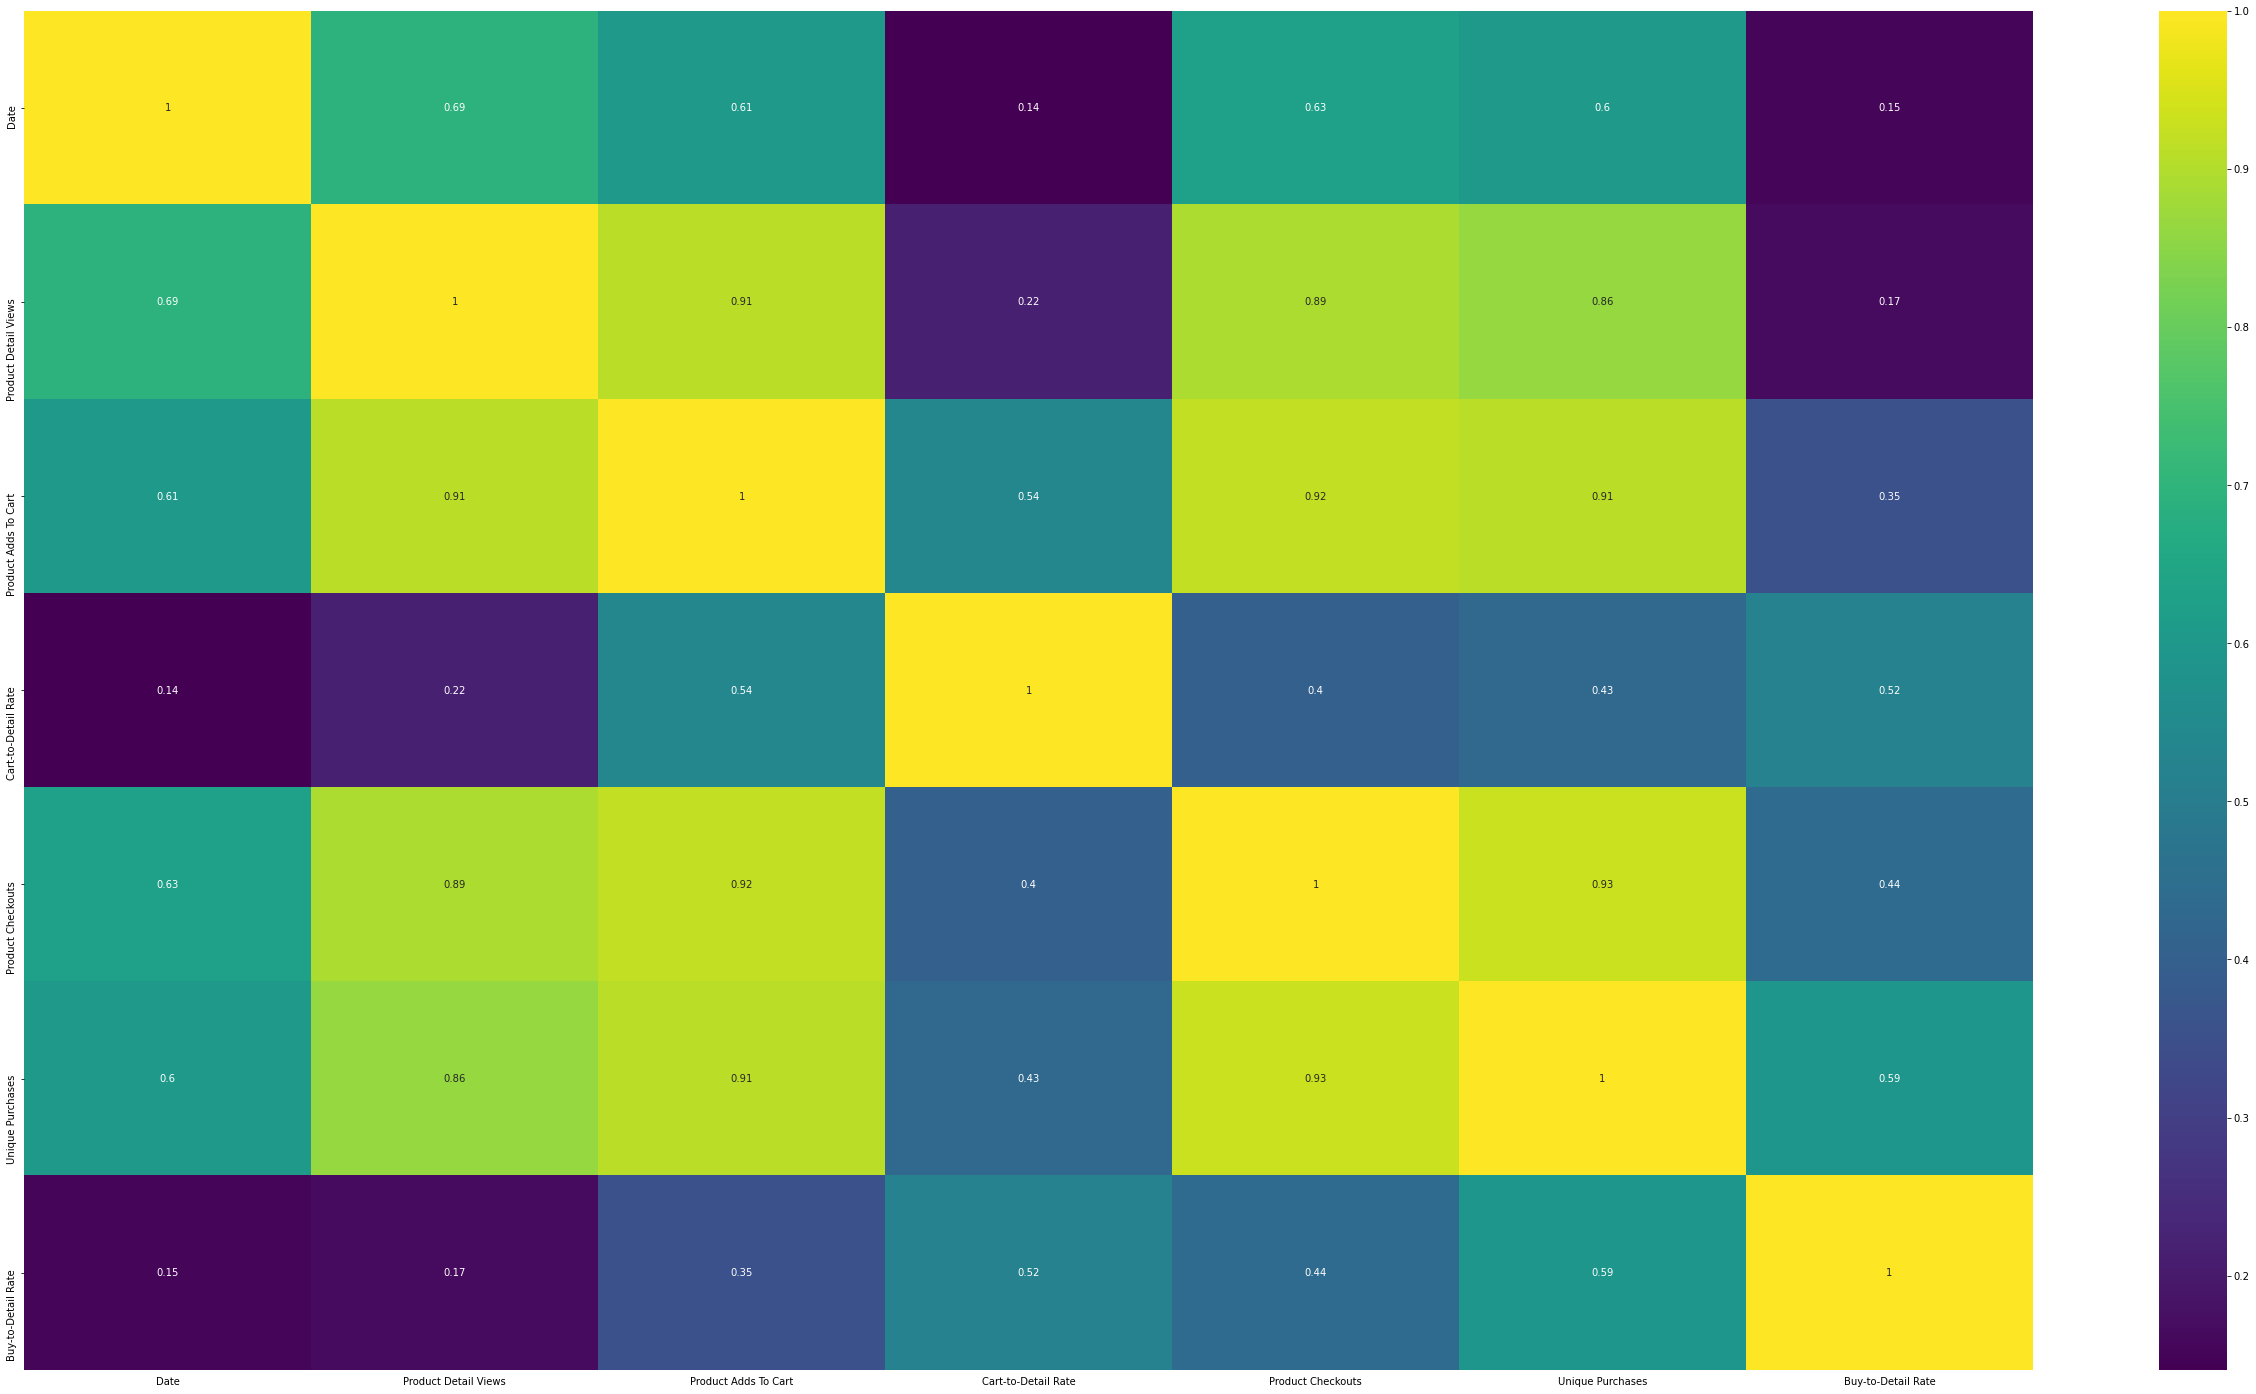

In [392]:
plt.figure(num=500, figsize=(45,25))
plt.tick_params(axis='x', which='both', labelbottom=True, labeltop=False, top=False, bottom=False)
sns.heatmap(ga_data.corr(),annot=True, cmap='viridis')

In [394]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, sum to sum
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         79 non-null     datetime64[ns]
 1   Peterborough                 79 non-null     float64       
 2   Sherburn_Putaway             79 non-null     float64       
 3   Northampton_Locked           79 non-null     float64       
 4   Sherburn_Prominent           79 non-null     float64       
 5   Sherburn_Unreceipted         79 non-null     float64       
 6   Sherburn_Hanging             79 non-null     float64       
 7   Northamton_Pickface          79 non-null     float64       
 8   CIMS_vs_Clipper_Allocatable  79 non-null     float64       
 9   ISM_Unlocked                 79 non-null     float64       
 10  ISM_Allocated                79 non-null     float64       
 11  ISM_Unshipped                79 non-null     floa

<AxesSubplot:>

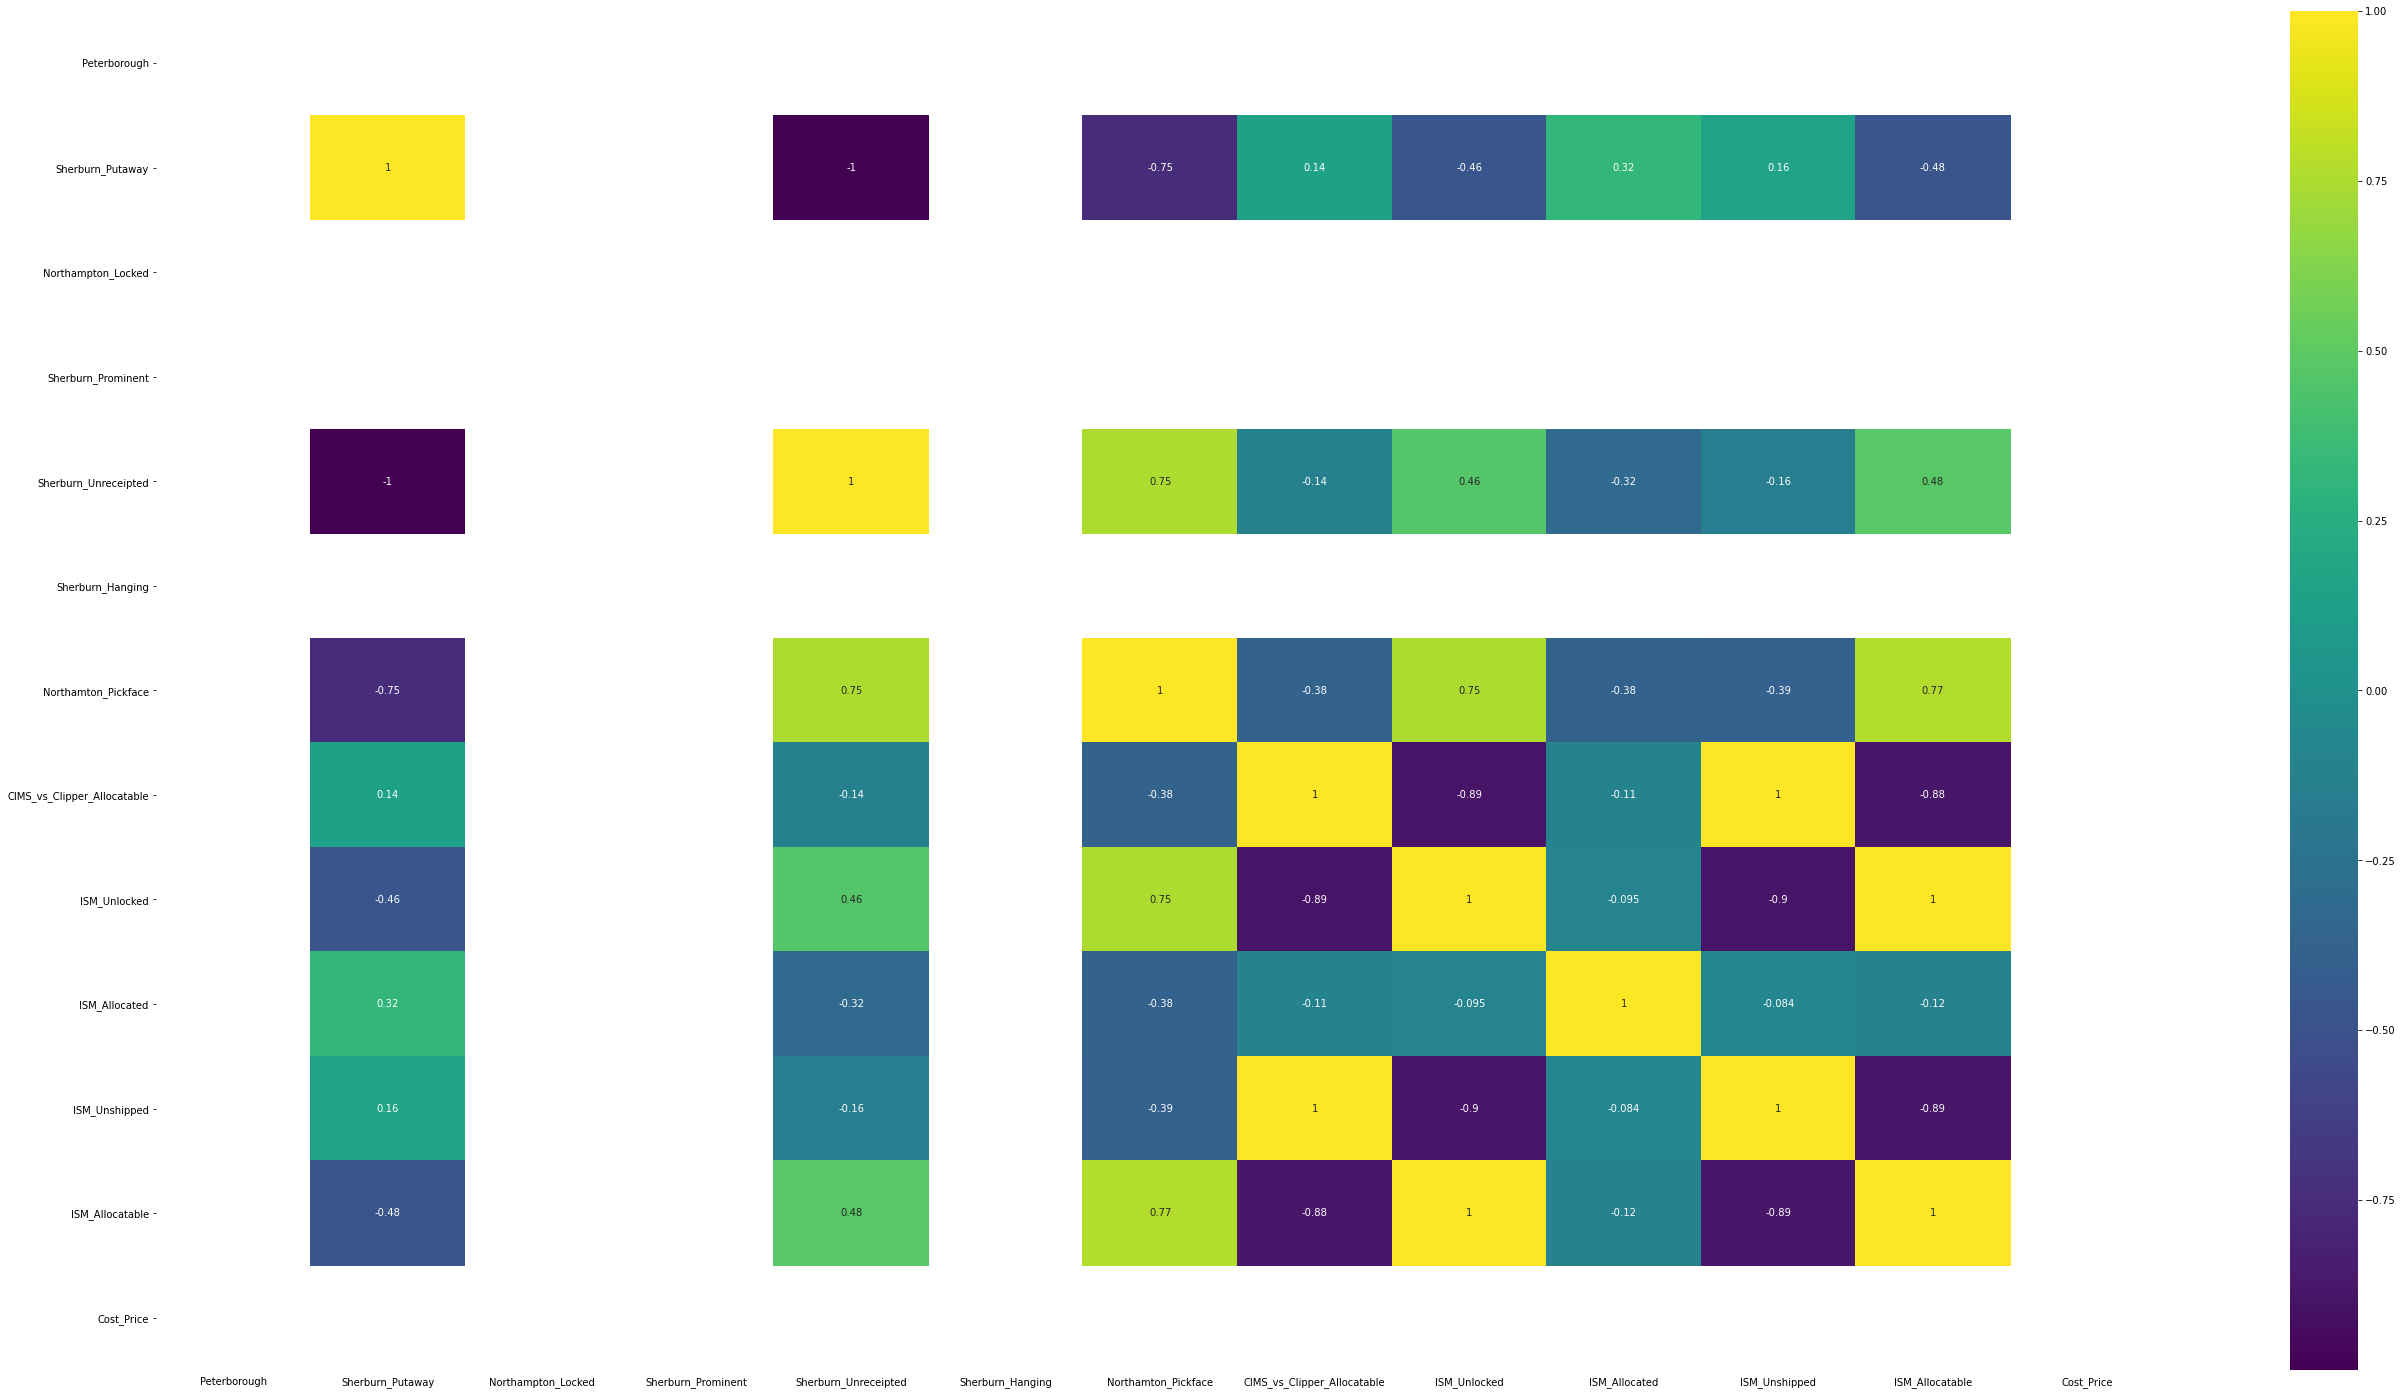

In [351]:
plt.figure(num=100, figsize=(45,25))
plt.tick_params(axis='x', which='both', labelbottom=True, labeltop=False, top=False, bottom=False)
sns.heatmap(df_all.corr(),annot=True, cmap='viridis')

In [396]:
ga_data['Date'] = pd.to_datetime(ga_data['Date'].astype('str'), format = '%Y%m%d')

In [397]:
ga_data.head()

,Date,Product Detail Views,Product Adds To Cart,Cart-to-Detail Rate,Product Checkouts,Unique Purchases,Buy-to-Detail Rate
0,2021-07-13,40,10,25.00,7,5,12.50
1,2021-07-14,61,31,50.82,16,6,9.84
2,2021-07-15,66,20,30.30,9,6,9.09
3,2021-07-16,49,10,20.41,1,1,2.04
4,2021-07-17,50,10,20.00,8,4,8.00


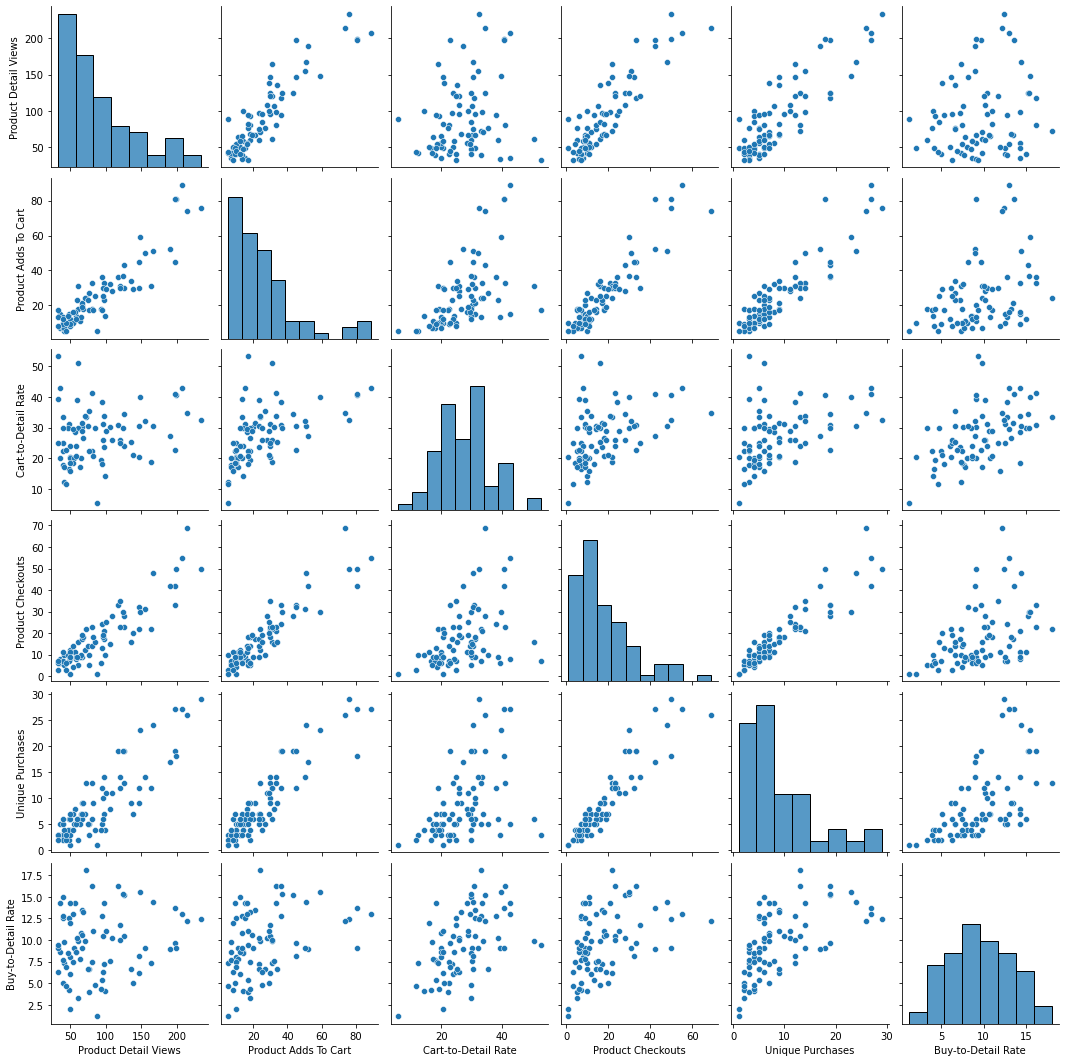

In [398]:
sns.pairplot(ga_data)

In [410]:
df_all.head()

,Date,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price
sum,2021-07-13,0.0,268.0,0.0,0.0,233.0,0.0,3345.0,-1.0,3351.0,1.0,4.0,3346.0,6.83
sum,2021-07-14,0.0,268.0,0.0,0.0,233.0,0.0,3340.0,-4.0,3348.0,0.0,4.0,3344.0,6.83
sum,2021-07-15,0.0,268.0,0.0,0.0,233.0,0.0,3335.0,3.0,3335.0,1.0,2.0,3332.0,6.83
sum,2021-07-16,0.0,268.0,0.0,0.0,233.0,0.0,3317.0,-9.0,3330.0,1.0,3.0,3326.0,6.83
sum,2021-07-17,0.0,268.0,0.0,0.0,233.0,0.0,3315.0,-8.0,3323.0,0.0,0.0,3323.0,6.83


In [413]:
# Scaling our columns

scale_vars = ['Sherburn_Putaway','Sherburn_Unreceipted','Northamton_Pickface','CIMS_vs_Clipper_Allocatable','ISM_Unlocked','ISM_Allocatable']
scaler = MinMaxScaler()
df_all[scale_vars] = scaler.fit_transform(df_all[scale_vars])
df_all.head()

,Date,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price
sum,2021-07-13,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.020082,1.000000,1.0,4.0,1.000000,6.83
sum,2021-07-14,0.0,0.0,0.0,0.0,1.0,0.0,0.994835,0.018852,0.999105,0.0,4.0,0.999402,6.83
sum,2021-07-15,0.0,0.0,0.0,0.0,1.0,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83
sum,2021-07-16,0.0,0.0,0.0,0.0,1.0,0.0,0.971074,0.016803,0.993733,1.0,3.0,0.994023,6.83
sum,2021-07-17,0.0,0.0,0.0,0.0,1.0,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83


In [417]:
df_all.head()

,Date,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price
sum,2021-07-13,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.020082,1.000000,1.0,4.0,1.000000,6.83
sum,2021-07-14,0.0,0.0,0.0,0.0,1.0,0.0,0.994835,0.018852,0.999105,0.0,4.0,0.999402,6.83
sum,2021-07-15,0.0,0.0,0.0,0.0,1.0,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83
sum,2021-07-16,0.0,0.0,0.0,0.0,1.0,0.0,0.971074,0.016803,0.993733,1.0,3.0,0.994023,6.83
sum,2021-07-17,0.0,0.0,0.0,0.0,1.0,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83


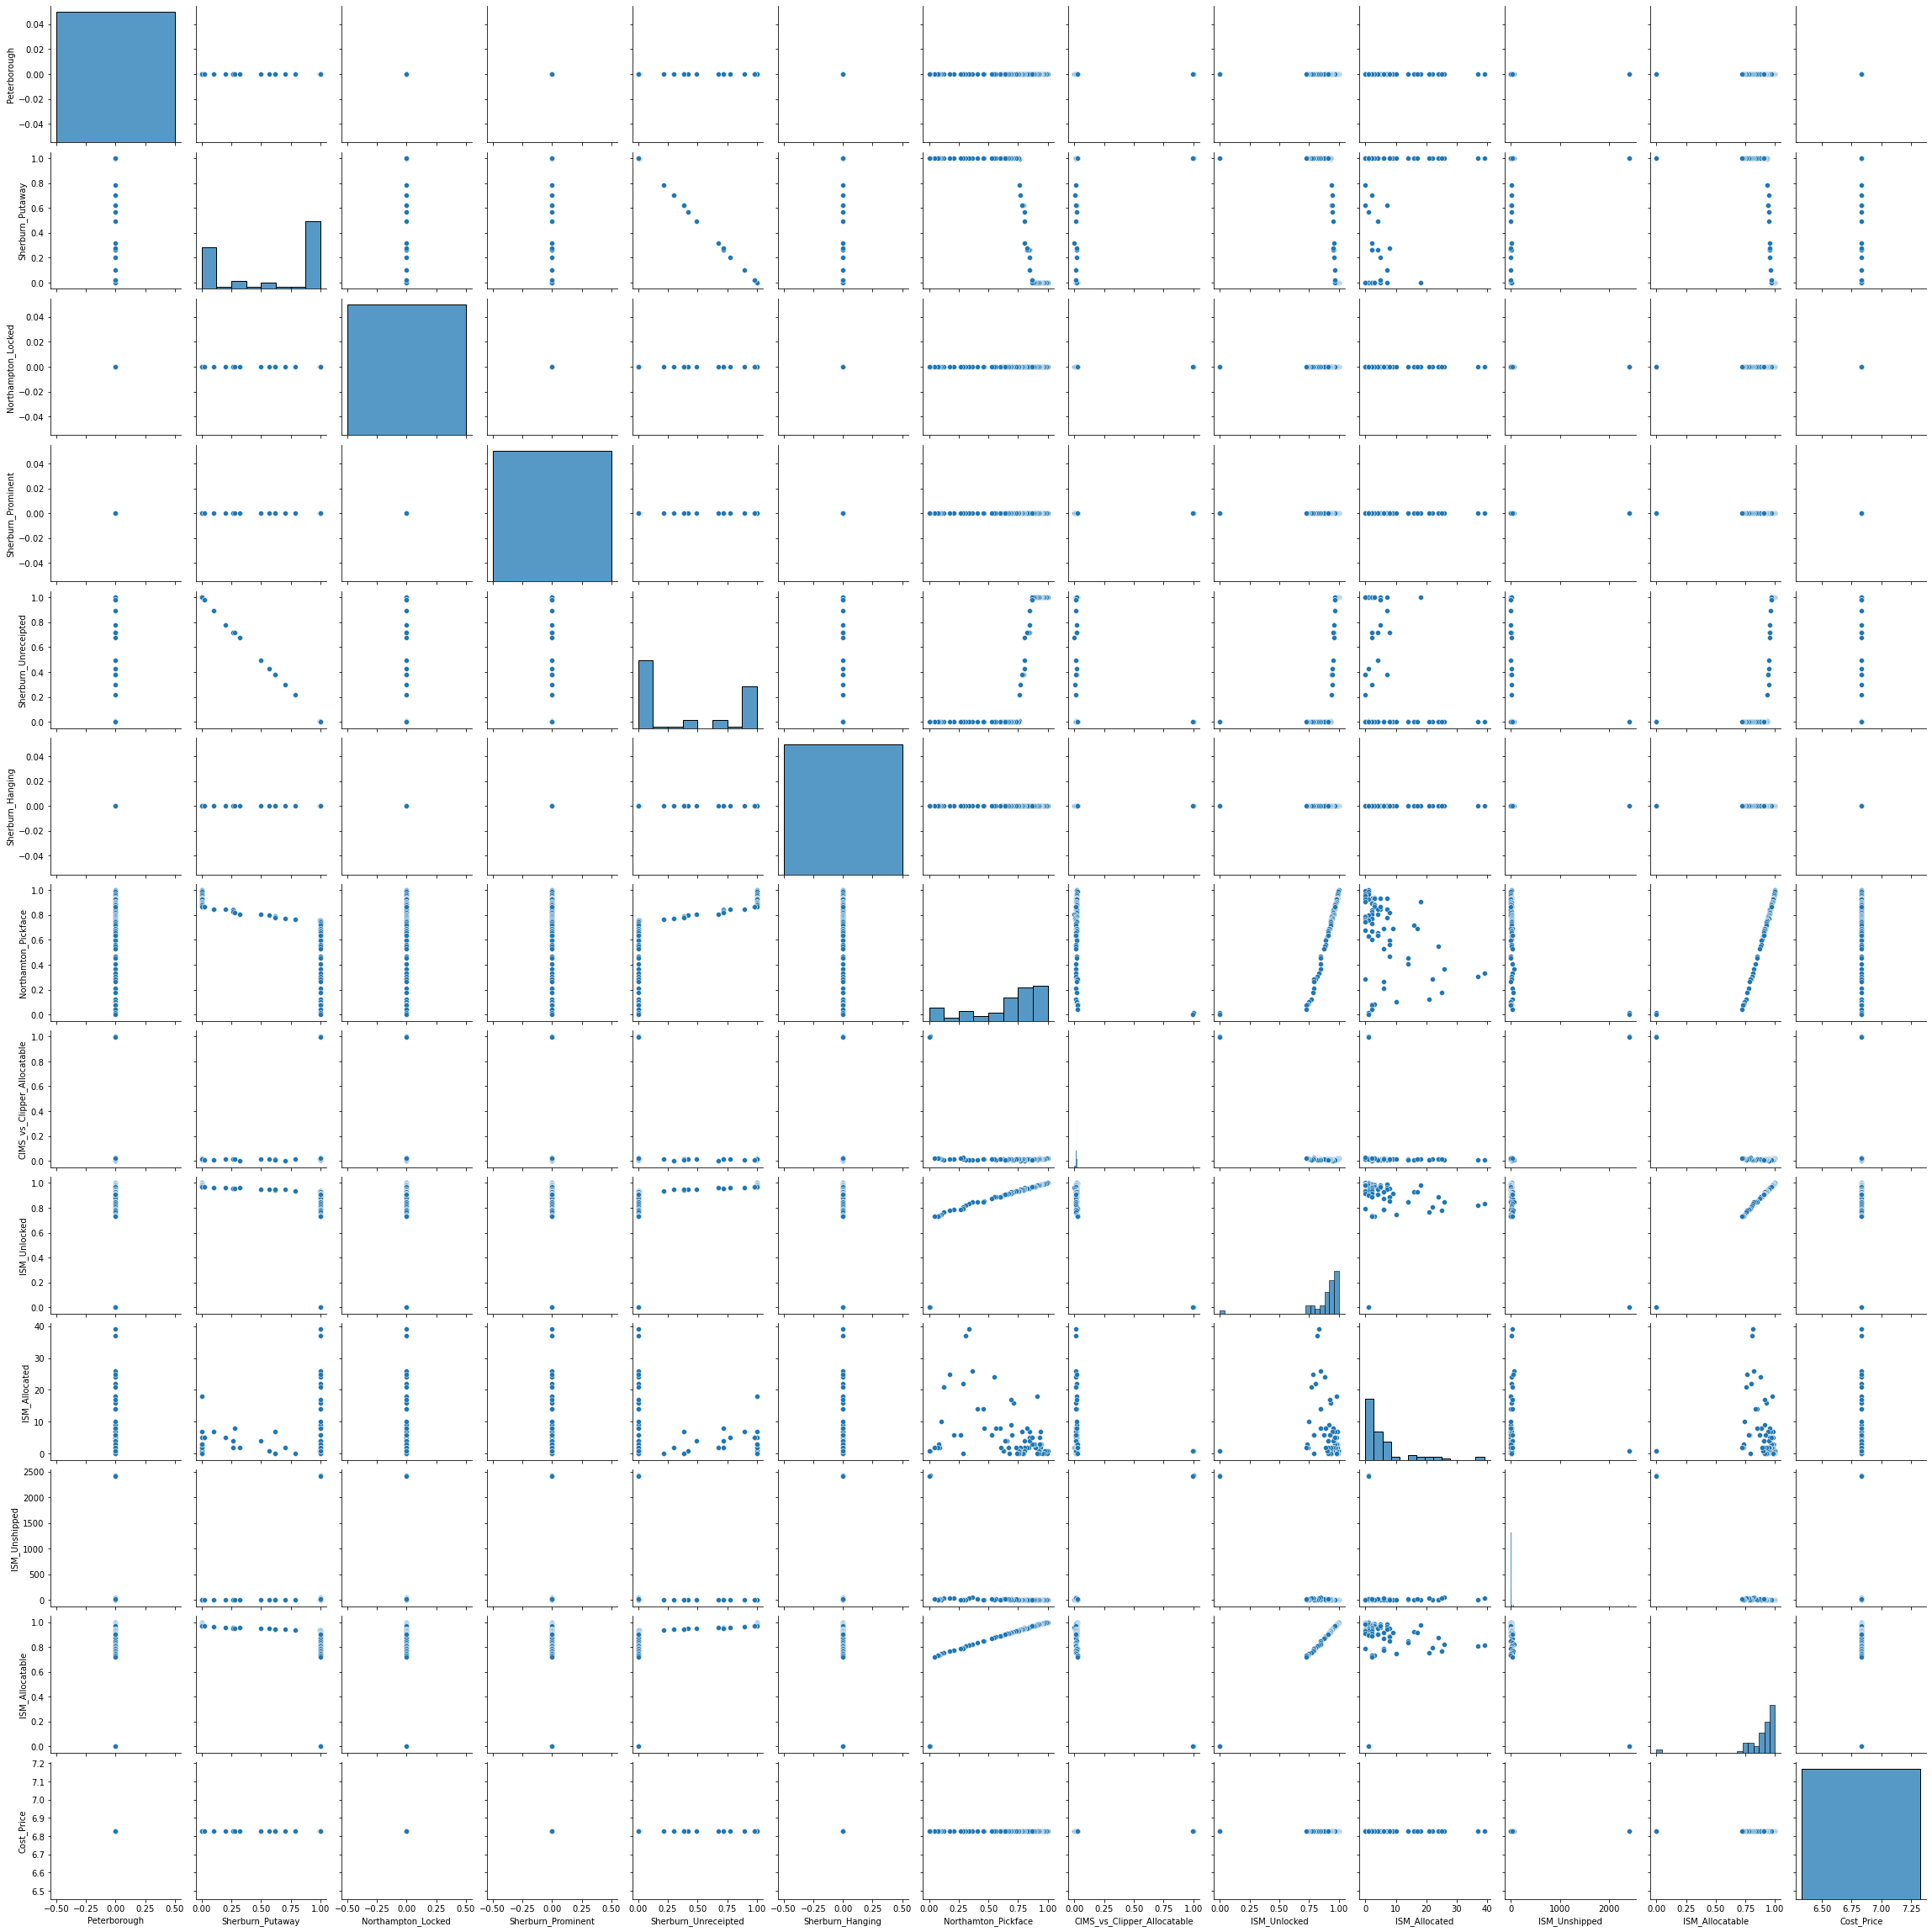

In [418]:
sns.pairplot(df_all)

# Hypothesis for product 51412

1) When there is more stock how does this affect web traffic?

2) Is there stronger conversion rate when there is more stock?


In [419]:
ga_data.head()

,Date,Product Detail Views,Product Adds To Cart,Cart-to-Detail Rate,Product Checkouts,Unique Purchases,Buy-to-Detail Rate
0,2021-07-13,40,10,25.00,7,5,12.50
1,2021-07-14,61,31,50.82,16,6,9.84
2,2021-07-15,66,20,30.30,9,6,9.09
3,2021-07-16,49,10,20.41,1,1,2.04
4,2021-07-17,50,10,20.00,8,4,8.00


In [420]:
df_all.head()

,Date,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price
sum,2021-07-13,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.020082,1.000000,1.0,4.0,1.000000,6.83
sum,2021-07-14,0.0,0.0,0.0,0.0,1.0,0.0,0.994835,0.018852,0.999105,0.0,4.0,0.999402,6.83
sum,2021-07-15,0.0,0.0,0.0,0.0,1.0,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83
sum,2021-07-16,0.0,0.0,0.0,0.0,1.0,0.0,0.971074,0.016803,0.993733,1.0,3.0,0.994023,6.83
sum,2021-07-17,0.0,0.0,0.0,0.0,1.0,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83


In [421]:
df_merge_pdv = pd.merge(df_all,ga_data[['Date','Product Detail Views']],on='Date', how='left')
df_merge_pac = pd.merge(df_all,ga_data[['Date','Product Adds To Cart']],on='Date', how='left')
df_merge_pc = pd.merge(df_all,ga_data[['Date','Product Checkouts']],on='Date', how='left')
df_merge_up = pd.merge(df_all,ga_data[['Date','Unique Purchases']],on='Date', how='left')

df_merge_pdv.to_csv('Stock-Product-Detail-Views.csv', index=False)
df_merge_pac.to_csv('Stock-Product-Adds-to-Cart.csv', index=False)
df_merge_pc.to_csv('Stock-Product-Checkouts.csv', index=False)
df_merge_up.to_csv('Stock-Unique-Purchases.csv', index=False)


# Model for Product details views Advanced regression using XGBoost

In [422]:
stockPDV=pd.read_csv('Stock-Product-Detail-Views.csv',delimiter=',')

In [423]:
stockPDV

,Date,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Product Detail Views
0,2021-07-13,0.0,0.000000,0.0,0.0,1.000000,0.0,1.000000,0.020082,1.000000,1.0,4.0,1.000000,6.83,40
1,2021-07-14,0.0,0.000000,0.0,0.0,1.000000,0.0,0.994835,0.018852,0.999105,0.0,4.0,0.999402,6.83,61
2,2021-07-15,0.0,0.000000,0.0,0.0,1.000000,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83,66
3,2021-07-16,0.0,0.000000,0.0,0.0,1.000000,0.0,0.971074,0.016803,0.993733,1.0,3.0,0.994023,6.83,49
4,2021-07-17,0.0,0.000000,0.0,0.0,1.000000,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83,50
5,2021-07-18,0.0,0.000000,0.0,0.0,1.000000,0.0,0.954545,0.015164,0.988959,0.0,0.0,0.990436,6.83,94
6,2021-07-19,0.0,0.000000,0.0,0.0,1.000000,0.0,0.942149,0.014754,0.988362,3.0,6.0,0.987149,6.83,76
7,2021-07-20,0.0,0.000000,0.0,0.0,1.000000,0.0,0.935950,0.013934,0.987765,2.0,9.0,0.985953,6.83,48
8,2021-07-21,0.0,0.000000,0.0,0.0,1.000000,0.0,0.935950,0.014754,0.985974,7.0,0.0,0.985356,6.83,58
9,2021-07-22,0.0,0.000000,0.0,0.0,1.000000,0.0,0.936983,0.016803,0.983885,3.0,1.0,0.984160,6.83,35


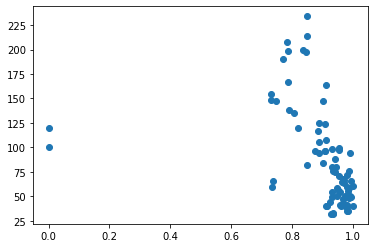

In [579]:
plt.scatter(stockPDV['ISM_Unlocked'],stockPDV['Product Detail Views'])

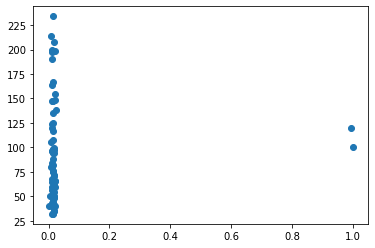

In [580]:
plt.scatter(stockPDV['CIMS_vs_Clipper_Allocatable'],stockPDV['Product Detail Views'])

In [581]:
#Out web traffic and page views seems to not have a relationship with every storage unit? 

In [453]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
stockPDV['Date'] = lbl.fit_transform(stockPDV['Date'].astype(str))

In [474]:
#stockPDV.drop('Date', inplace=True, axis=1)

In [476]:
stockPDV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Peterborough                 79 non-null     float64
 1   Sherburn_Putaway             79 non-null     float64
 2   Northampton_Locked           79 non-null     float64
 3   Sherburn_Prominent           79 non-null     float64
 4   Sherburn_Unreceipted         79 non-null     float64
 5   Sherburn_Hanging             79 non-null     float64
 6   Northamton_Pickface          79 non-null     float64
 7   CIMS_vs_Clipper_Allocatable  79 non-null     float64
 8   ISM_Unlocked                 79 non-null     float64
 9   ISM_Allocated                79 non-null     float64
 10  ISM_Unshipped                79 non-null     float64
 11  ISM_Allocatable              79 non-null     float64
 12  Cost_Price                   79 non-null     float64
 13  Product Detail Views  

In [584]:
x=stockPDV[stockPDV.columns[:-1]]
y=stockPDV['Product Detail Views']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [585]:
x.isnull().sum()

Peterborough                   0
Sherburn_Putaway               0
Northampton_Locked             0
Sherburn_Prominent             0
Sherburn_Unreceipted           0
Sherburn_Hanging               0
Northamton_Pickface            0
CIMS_vs_Clipper_Allocatable    0
ISM_Unlocked                   0
ISM_Allocated                  0
ISM_Unshipped                  0
ISM_Allocatable                0
Cost_Price                     0
dtype: int64

In [586]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(39, 13)
(39,)
(40, 13)
(40,)


In [480]:
#Merge train data to make one file to export

train_data=pd.concat([x_train, y_train], axis=1)

In [481]:
train_data

,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Product Detail Views
27,0.0,0.262069,0.0,0.0,0.715278,0.0,0.826446,0.017623,0.954939,2.0,14.0,0.951584,6.83,99
62,0.0,1.000000,0.0,0.0,0.000000,0.0,0.407025,0.007377,0.848702,14.0,27.0,0.837717,6.83,214
8,0.0,0.000000,0.0,0.0,1.000000,0.0,0.935950,0.014754,0.985974,7.0,0.0,0.985356,6.83,58
57,0.0,1.000000,0.0,0.0,0.000000,0.0,0.527893,0.013934,0.876455,6.0,27.0,0.867902,6.83,96
41,0.0,1.000000,0.0,0.0,0.000000,0.0,0.742769,0.014344,0.931961,0.0,12.0,0.929767,6.83,49
61,0.0,1.000000,0.0,0.0,0.000000,0.0,0.454545,0.015574,0.848702,14.0,1.0,0.845487,6.83,234
39,0.0,1.000000,0.0,0.0,0.000000,0.0,0.755165,0.013525,0.934050,1.0,4.0,0.933951,6.83,32
18,0.0,0.000000,0.0,0.0,1.000000,0.0,0.894628,0.016393,0.971949,2.0,2.0,0.972206,6.83,48
28,0.0,0.275862,0.0,0.0,0.715278,0.0,0.822314,0.016393,0.953148,8.0,3.0,0.951285,6.83,71
69,0.0,1.000000,0.0,0.0,0.000000,0.0,0.209711,0.013934,0.787228,6.0,36.0,0.775852,6.83,167


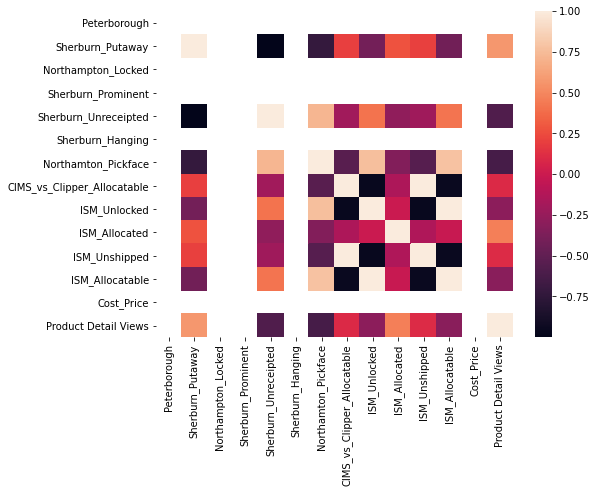

In [482]:
corr_df = train_data.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=False)
plt.show()

In [587]:
corr = train_data.corr()[['Product Detail Views']].sort_values(by='Product Detail Views',ascending=False)
corr

,Product Detail Views
Product Detail Views,1.000000
Sherburn_Putaway,0.578140
ISM_Allocated,0.463573
ISM_Unshipped,0.105478
CIMS_vs_Clipper_Allocatable,0.094990
ISM_Unlocked,-0.295224
ISM_Allocatable,-0.306907
Sherburn_Unreceipted,-0.578690
Northamton_Pickface,-0.629103
Peterborough,NaN


Three top storage: **Sherburn_Putaway, ISM_Allocated and Northampton_Locked**

In [484]:
train_data['Product Detail Views'].describe()

count     39.000000
mean      89.230769
std       50.884007
min       32.000000
25%       48.500000
50%       76.000000
75%      112.500000
max      234.000000
Name: Product Detail Views, dtype: float64

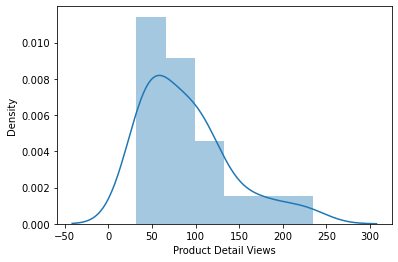

In [485]:
sns.distplot(train_data['Product Detail Views'])
plt.show()

In [588]:
from scipy.stats import skew
from scipy.stats import kurtosis
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(train_data['Product Detail Views']) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(train_data['Product Detail Views']) ))

excess kurtosis of normal distribution (should be 0): 0.7625475915295286
skewness of normal distribution (should be 0): 1.1405267732296238


Lets begin!

In [487]:
def hyperParameterTuning(x_train, y_train):
    param_tuning = {
        "max_depth": [2, 3, 4, 5,7,10],
        #The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.
        "n_estimators": [20, 30, 40, 50, 60, 70, 100],
        #This is the number of trees you want to build before taking the maximum voting or averages of predictions.
        "learning_rate": [0.01, 0.05, 0.1],
        #determines the step size at each iteration while moving toward a minimum of a loss function
        'min_child_weight': [1, 3, 5, 10],
        #minimum sum of instance weight (hessian) needed in a child
        'colsample_bytree': [0.3, 0.4, 0.6, 0.8],
        #colsample_bytree is the subsample ratio of columns when constructing each tree
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(x_train,y_train)

    return gsearch.best_params_

In [589]:
hyperParameterTuning(x_train, y_train)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


{'colsample_bytree': 0.6,
 'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 10,
 'n_estimators': 20,
 'objective': 'reg:squarederror'}

lets now train the model with the hyperparameters found!

In [592]:
xgb_model = XGBRegressor(objective = 'reg:squarederror',learning_rate=0.6,min_child_weight = 10,n_estimators=20,max_depth=2,colsample_bytree=0.6)

xgb_reg = xgb_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(x_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

In [593]:
mae_xgb

29.898504161834715

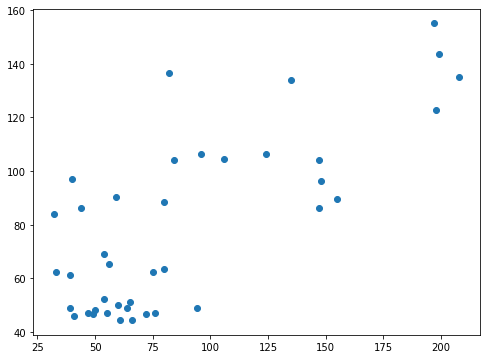

In [491]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb)
plt.show()

In [492]:
x_test

,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price
68,0.0,1.000000,0.0,0.0,0.000000,0.0,0.262397,0.020082,0.787228,6.0,0.0,0.786611,6.83
13,0.0,0.000000,0.0,0.0,1.000000,0.0,0.926653,0.015574,0.980901,1.0,0.0,0.982068,6.83
37,0.0,0.786207,0.0,0.0,0.215278,0.0,0.763430,0.013934,0.936138,0.0,5.0,0.936043,6.83
15,0.0,0.000000,0.0,0.0,1.000000,0.0,0.908058,0.010246,0.979111,0.0,0.0,0.980574,6.83
2,0.0,0.000000,0.0,0.0,1.000000,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83
4,0.0,0.000000,0.0,0.0,1.000000,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83
59,0.0,1.000000,0.0,0.0,0.000000,0.0,0.639463,0.011475,0.909579,4.0,26.0,0.901973,6.83
45,0.0,1.000000,0.0,0.0,0.000000,0.0,0.691116,0.015164,0.924799,17.0,23.0,0.914226,6.83
40,0.0,1.000000,0.0,0.0,0.000000,0.0,0.752066,0.015164,0.931961,0.0,5.0,0.931859,6.83
6,0.0,0.000000,0.0,0.0,1.000000,0.0,0.942149,0.014754,0.988362,3.0,6.0,0.987149,6.83


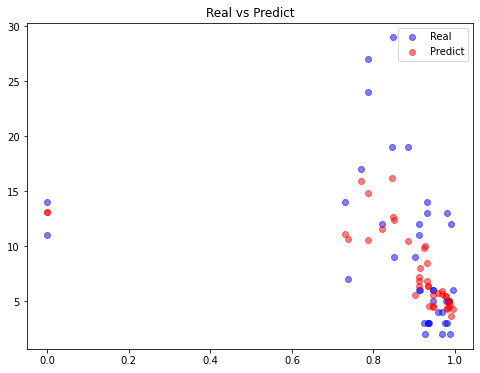

In [573]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test['ISM_Unlocked'], y_test, color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['ISM_Unlocked'], y_pred_xgb,  color='red' , label='Predict', alpha=0.5)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

In [494]:
x_test

,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price
68,0.0,1.000000,0.0,0.0,0.000000,0.0,0.262397,0.020082,0.787228,6.0,0.0,0.786611,6.83
13,0.0,0.000000,0.0,0.0,1.000000,0.0,0.926653,0.015574,0.980901,1.0,0.0,0.982068,6.83
37,0.0,0.786207,0.0,0.0,0.215278,0.0,0.763430,0.013934,0.936138,0.0,5.0,0.936043,6.83
15,0.0,0.000000,0.0,0.0,1.000000,0.0,0.908058,0.010246,0.979111,0.0,0.0,0.980574,6.83
2,0.0,0.000000,0.0,0.0,1.000000,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83
4,0.0,0.000000,0.0,0.0,1.000000,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83
59,0.0,1.000000,0.0,0.0,0.000000,0.0,0.639463,0.011475,0.909579,4.0,26.0,0.901973,6.83
45,0.0,1.000000,0.0,0.0,0.000000,0.0,0.691116,0.015164,0.924799,17.0,23.0,0.914226,6.83
40,0.0,1.000000,0.0,0.0,0.000000,0.0,0.752066,0.015164,0.931961,0.0,5.0,0.931859,6.83
6,0.0,0.000000,0.0,0.0,1.000000,0.0,0.942149,0.014754,0.988362,3.0,6.0,0.987149,6.83


In [495]:
y_pred_xgb

array([122.62618 ,  48.79005 ,  62.152733,  50.189854,  44.42126 ,
        48.128468, 106.40845 ,  86.354614,  69.037865,  47.14623 ,
        63.55254 , 133.90648 ,  46.484646, 104.67105 ,  83.91263 ,
       136.55559 ,  96.16858 ,  48.79005 ,  86.119095,  61.05261 ,
        52.08997 ,  47.14623 , 135.12036 , 104.1542  ,  62.152733,
        51.08566 ,  89.57366 ,  46.484646,  47.14623 ,  88.59804 ,
       143.81868 ,  48.79005 ,  44.42126 , 104.1542  , 106.40845 ,
        65.28994 ,  90.18409 ,  96.9964  ,  46.065083, 155.0754  ],
      dtype=float32)

<Figure size 72x360 with 0 Axes>

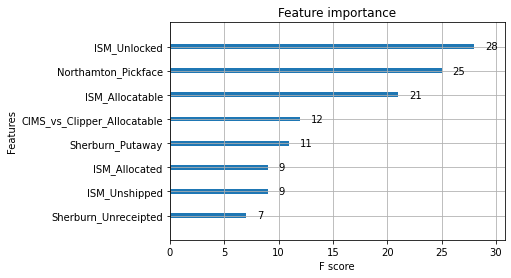

In [496]:
plt.figure(figsize=(1, 5))
xgb.plot_importance(xgb_reg, max_num_features=10)
plt.show()

# Model for Product Add to Cart Advanced regression using XGBoost

In [497]:
stockPAC=pd.read_csv('Stock-Product-Adds-to-Cart.csv',delimiter=',')

In [499]:
stockPAC.head()

,Date,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Product Adds To Cart
0,2021-07-13,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.020082,1.000000,1.0,4.0,1.000000,6.83,10
1,2021-07-14,0.0,0.0,0.0,0.0,1.0,0.0,0.994835,0.018852,0.999105,0.0,4.0,0.999402,6.83,31
2,2021-07-15,0.0,0.0,0.0,0.0,1.0,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83,20
3,2021-07-16,0.0,0.0,0.0,0.0,1.0,0.0,0.971074,0.016803,0.993733,1.0,3.0,0.994023,6.83,10
4,2021-07-17,0.0,0.0,0.0,0.0,1.0,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83,10


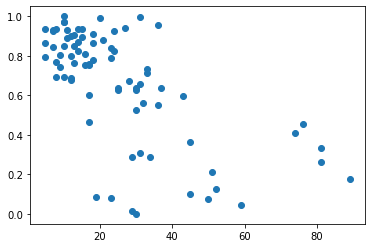

In [500]:
plt.scatter(stockPAC['Product Adds To Cart'],stockPAC['Northamton_Pickface'])

In [501]:
stockPAC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         79 non-null     object 
 1   Peterborough                 79 non-null     float64
 2   Sherburn_Putaway             79 non-null     float64
 3   Northampton_Locked           79 non-null     float64
 4   Sherburn_Prominent           79 non-null     float64
 5   Sherburn_Unreceipted         79 non-null     float64
 6   Sherburn_Hanging             79 non-null     float64
 7   Northamton_Pickface          79 non-null     float64
 8   CIMS_vs_Clipper_Allocatable  79 non-null     float64
 9   ISM_Unlocked                 79 non-null     float64
 10  ISM_Allocated                79 non-null     float64
 11  ISM_Unshipped                79 non-null     float64
 12  ISM_Allocatable              79 non-null     float64
 13  Cost_Price            

In [502]:
stockPAC.drop('Date', inplace=True, axis=1)

In [503]:
x=stockPAC[stockPAC.columns[:-1]]
y=stockPAC['Product Adds To Cart']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

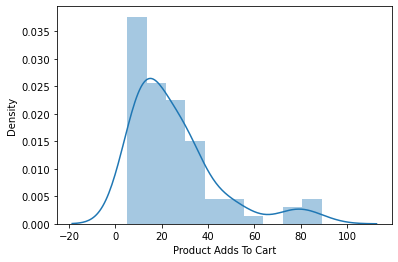

In [506]:
sns.distplot(stockPAC['Product Adds To Cart'])
plt.show()

In [507]:
from scipy.stats import skew
from scipy.stats import kurtosis
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(stockPAC['Product Adds To Cart']) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(stockPAC['Product Adds To Cart']) ))

excess kurtosis of normal distribution (should be 0): 2.330694833295789
skewness of normal distribution (should be 0): 1.6044298630000675


In [508]:
def hyperParameterTuning(x_train, y_train):
    param_tuning = {
        "max_depth": [2, 3, 4, 5,7,10],
        #The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.
        "n_estimators": [20, 30, 40, 50, 60, 70, 100],
        #This is the number of trees you want to build before taking the maximum voting or averages of predictions.
        "learning_rate": [0.01, 0.05, 0.1],
        #determines the step size at each iteration while moving toward a minimum of a loss function
        'min_child_weight': [1, 3, 5, 10],
        #minimum sum of instance weight (hessian) needed in a child
        'colsample_bytree': [0.3, 0.4, 0.6, 0.8],
        #colsample_bytree is the subsample ratio of columns when constructing each tree
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(x_train,y_train)

    return gsearch.best_params_

In [509]:
hyperParameterTuning(x_train, y_train)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


{'colsample_bytree': 0.3,
 'learning_rate': 0.05,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 60,
 'objective': 'reg:squarederror'}

In [510]:
xgb_model = XGBRegressor(objective = 'reg:squarederror',learning_rate=0.05,min_child_weight = 1,n_estimators=60,max_depth=4,colsample_bytree=0.3)

xgb_reg = xgb_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(x_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

In [515]:
mae_xgb #Mean absolute error

11.23611764907837

In [518]:
x_test

,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price
76,0.0,1.000000,0.0,0.0,0.000000,0.0,0.043388,0.022541,0.729931,2.0,30.0,0.721458,6.83
51,0.0,1.000000,0.0,0.0,0.000000,0.0,0.627066,0.012295,0.902119,1.0,18.0,0.897788,6.83
25,0.0,0.262069,0.0,0.0,0.715278,0.0,0.844008,0.015574,0.958520,4.0,2.0,0.958159,6.83
2,0.0,0.000000,0.0,0.0,1.000000,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83
33,0.0,0.620690,0.0,0.0,0.381944,0.0,0.793388,0.015164,0.942405,0.0,0.0,0.943814,6.83
27,0.0,0.262069,0.0,0.0,0.715278,0.0,0.826446,0.017623,0.954939,2.0,14.0,0.951584,6.83
23,0.0,0.103448,0.0,0.0,0.895833,0.0,0.847107,0.009836,0.964488,7.0,2.0,0.963240,6.83
35,0.0,0.620690,0.0,0.0,0.381944,0.0,0.779959,0.010656,0.945986,7.0,7.0,0.943216,6.83
14,0.0,0.000000,0.0,0.0,1.000000,0.0,0.925620,0.017213,0.979708,0.0,2.0,0.980574,6.83
32,0.0,0.020690,0.0,0.0,0.979167,0.0,0.864669,0.010656,0.968666,5.0,3.0,0.967723,6.83


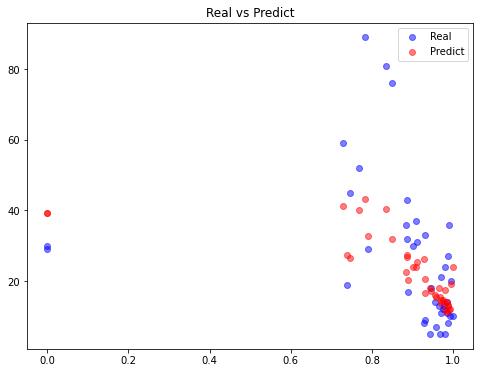

In [522]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test['ISM_Unlocked'], y_test, color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['ISM_Unlocked'], y_pred_xgb,  color='red' , label='Predict', alpha=0.5)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

<Figure size 72x360 with 0 Axes>

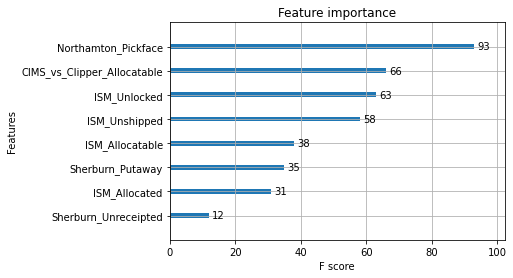

In [520]:
plt.figure(figsize=(1, 5))
xgb.plot_importance(xgb_reg, max_num_features=10)
plt.show()

# Model for Stock Product Checkouts Advanced regression using XGBoost

In [523]:
stockPC=pd.read_csv('Stock-Product-Checkouts.csv',delimiter=',')

In [524]:
stockPC.head()

,Date,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Product Checkouts
0,2021-07-13,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.020082,1.000000,1.0,4.0,1.000000,6.83,7
1,2021-07-14,0.0,0.0,0.0,0.0,1.0,0.0,0.994835,0.018852,0.999105,0.0,4.0,0.999402,6.83,16
2,2021-07-15,0.0,0.0,0.0,0.0,1.0,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83,9
3,2021-07-16,0.0,0.0,0.0,0.0,1.0,0.0,0.971074,0.016803,0.993733,1.0,3.0,0.994023,6.83,1
4,2021-07-17,0.0,0.0,0.0,0.0,1.0,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83,8


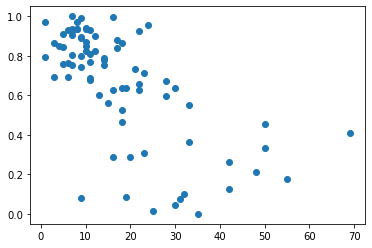

In [526]:
plt.scatter(stockPC['Product Checkouts'],stockPC['Northamton_Pickface'])

In [527]:
stockPC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         79 non-null     object 
 1   Peterborough                 79 non-null     float64
 2   Sherburn_Putaway             79 non-null     float64
 3   Northampton_Locked           79 non-null     float64
 4   Sherburn_Prominent           79 non-null     float64
 5   Sherburn_Unreceipted         79 non-null     float64
 6   Sherburn_Hanging             79 non-null     float64
 7   Northamton_Pickface          79 non-null     float64
 8   CIMS_vs_Clipper_Allocatable  79 non-null     float64
 9   ISM_Unlocked                 79 non-null     float64
 10  ISM_Allocated                79 non-null     float64
 11  ISM_Unshipped                79 non-null     float64
 12  ISM_Allocatable              79 non-null     float64
 13  Cost_Price            

In [528]:
stockPC.drop('Date', inplace=True, axis=1)

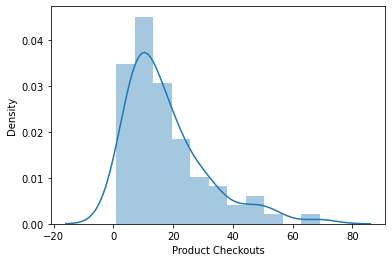

In [531]:
sns.distplot(stockPC['Product Checkouts'])
plt.show()

In [532]:
from scipy.stats import skew
from scipy.stats import kurtosis
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(stockPC['Product Checkouts']) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(stockPC['Product Checkouts']) ))

excess kurtosis of normal distribution (should be 0): 2.2765230701464274
skewness of normal distribution (should be 0): 1.5151181811725536


In [534]:
x=stockPC[stockPC.columns[:-1]]
y=stockPC['Product Checkouts']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [535]:
def hyperParameterTuning(x_train, y_train):
    param_tuning = {
        "max_depth": [2, 3, 4, 5,7,10],
        #The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.
        "n_estimators": [20, 30, 40, 50, 60, 70, 100],
        #This is the number of trees you want to build before taking the maximum voting or averages of predictions.
        "learning_rate": [0.01, 0.05, 0.1],
        #determines the step size at each iteration while moving toward a minimum of a loss function
        'min_child_weight': [1, 3, 5, 10],
        #minimum sum of instance weight (hessian) needed in a child
        'colsample_bytree': [0.3, 0.4, 0.6, 0.8],
        #colsample_bytree is the subsample ratio of columns when constructing each tree
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(x_train,y_train)

    return gsearch.best_params_

In [536]:
hyperParameterTuning(x_train, y_train)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


{'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'max_depth': 2,
 'min_child_weight': 10,
 'n_estimators': 40,
 'objective': 'reg:squarederror'}

In [537]:
xgb_model = XGBRegressor(objective = 'reg:squarederror',learning_rate=0.05,min_child_weight = 2,n_estimators=40,max_depth=2,colsample_bytree=0.6)

xgb_reg = xgb_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(x_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

In [539]:
mean_squared_error(y_test, y_pred_xgb)

142.60007328471335

In [540]:
mae_xgb


9.135534739494323

In [541]:
stockPC

,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Product Checkouts
0,0.0,0.000000,0.0,0.0,1.000000,0.0,1.000000,0.020082,1.000000,1.0,4.0,1.000000,6.83,7
1,0.0,0.000000,0.0,0.0,1.000000,0.0,0.994835,0.018852,0.999105,0.0,4.0,0.999402,6.83,16
2,0.0,0.000000,0.0,0.0,1.000000,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83,9
3,0.0,0.000000,0.0,0.0,1.000000,0.0,0.971074,0.016803,0.993733,1.0,3.0,0.994023,6.83,1
4,0.0,0.000000,0.0,0.0,1.000000,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83,8
5,0.0,0.000000,0.0,0.0,1.000000,0.0,0.954545,0.015164,0.988959,0.0,0.0,0.990436,6.83,24
6,0.0,0.000000,0.0,0.0,1.000000,0.0,0.942149,0.014754,0.988362,3.0,6.0,0.987149,6.83,10
7,0.0,0.000000,0.0,0.0,1.000000,0.0,0.935950,0.013934,0.987765,2.0,9.0,0.985953,6.83,7
8,0.0,0.000000,0.0,0.0,1.000000,0.0,0.935950,0.014754,0.985974,7.0,0.0,0.985356,6.83,8
9,0.0,0.000000,0.0,0.0,1.000000,0.0,0.936983,0.016803,0.983885,3.0,1.0,0.984160,6.83,8


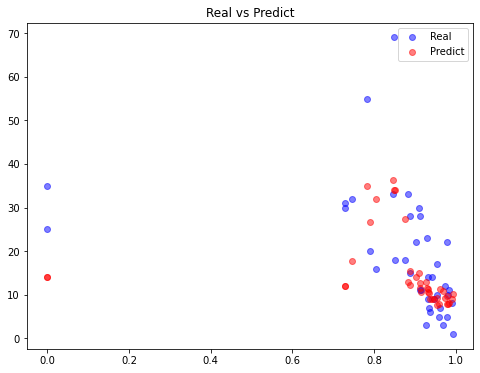

In [543]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test['ISM_Unlocked'], y_test, color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['ISM_Unlocked'], y_pred_xgb,  color='red' , label='Predict', alpha=0.5)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

<Figure size 72x360 with 0 Axes>

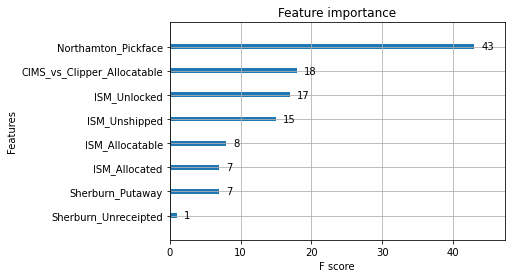

In [544]:
plt.figure(figsize=(1, 5))
xgb.plot_importance(xgb_reg, max_num_features=10)
plt.show()

# Model for Unique Purchases Advanced regression using XGBoost

In [545]:

stockUP=pd.read_csv('Stock-Unique-Purchases.csv',delimiter=',')

In [546]:
stockUP.head()

,Date,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Unique Purchases
0,2021-07-13,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.020082,1.000000,1.0,4.0,1.000000,6.83,5
1,2021-07-14,0.0,0.0,0.0,0.0,1.0,0.0,0.994835,0.018852,0.999105,0.0,4.0,0.999402,6.83,6
2,2021-07-15,0.0,0.0,0.0,0.0,1.0,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83,6
3,2021-07-16,0.0,0.0,0.0,0.0,1.0,0.0,0.971074,0.016803,0.993733,1.0,3.0,0.994023,6.83,1
4,2021-07-17,0.0,0.0,0.0,0.0,1.0,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83,4


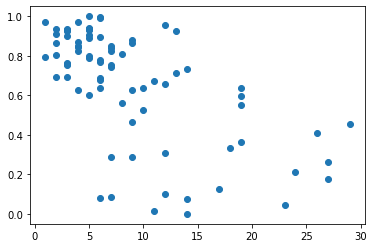

In [548]:
plt.scatter(stockUP['Unique Purchases'],stockUP['Northamton_Pickface'])

In [549]:
stockUP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         79 non-null     object 
 1   Peterborough                 79 non-null     float64
 2   Sherburn_Putaway             79 non-null     float64
 3   Northampton_Locked           79 non-null     float64
 4   Sherburn_Prominent           79 non-null     float64
 5   Sherburn_Unreceipted         79 non-null     float64
 6   Sherburn_Hanging             79 non-null     float64
 7   Northamton_Pickface          79 non-null     float64
 8   CIMS_vs_Clipper_Allocatable  79 non-null     float64
 9   ISM_Unlocked                 79 non-null     float64
 10  ISM_Allocated                79 non-null     float64
 11  ISM_Unshipped                79 non-null     float64
 12  ISM_Allocatable              79 non-null     float64
 13  Cost_Price            

In [550]:
stockUP.drop('Date', inplace=True, axis=1)

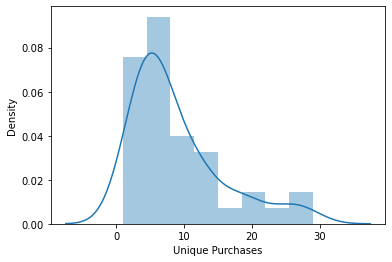

In [553]:
sns.distplot(stockUP['Unique Purchases'])
plt.show()

In [555]:
from scipy.stats import skew
from scipy.stats import kurtosis
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(stockUP['Unique Purchases']) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(stockUP['Unique Purchases']) ))

excess kurtosis of normal distribution (should be 0): 1.1229278147389703
skewness of normal distribution (should be 0): 1.3534111931857506


In [574]:
x=stockUP[stockUP.columns[:-1]]
y=stockUP['Unique Purchases']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [559]:
def hyperParameterTuning(x_train, y_train):
    param_tuning = {
        "max_depth": [2, 3, 4, 5,7,10],
        #The maximum depth is the number of nodes along the longest path from the root node down to the farthest leaf node.
        "n_estimators": [20, 30, 40, 50, 60, 70, 100],
        #This is the number of trees you want to build before taking the maximum voting or averages of predictions.
        "learning_rate": [0.01, 0.05, 0.1],
        #determines the step size at each iteration while moving toward a minimum of a loss function
        'min_child_weight': [1, 3, 5, 10],
        #minimum sum of instance weight (hessian) needed in a child
        'colsample_bytree': [0.3, 0.4, 0.6, 0.8],
        #colsample_bytree is the subsample ratio of columns when constructing each tree
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(x_train,y_train)

    return gsearch.best_params_

In [560]:
hyperParameterTuning(x_train, y_train)

Fitting 5 folds for each of 2016 candidates, totalling 10080 fits


{'colsample_bytree': 0.3,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 20,
 'objective': 'reg:squarederror'}

In [576]:
xgb_model = XGBRegressor(objective = 'reg:squarederror',learning_rate=0.1,min_child_weight = 5,n_estimators=20,max_depth=4,colsample_bytree=0.3)

xgb_reg = xgb_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

y_pred_xgb = xgb_model.predict(x_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

In [577]:
mean_squared_error(y_test, y_pred_xgb)

22.4155325896595

In [578]:
mae_xgb

3.410862421989441

In [565]:
stockUP

,Peterborough,Sherburn_Putaway,Northampton_Locked,Sherburn_Prominent,Sherburn_Unreceipted,Sherburn_Hanging,Northamton_Pickface,CIMS_vs_Clipper_Allocatable,ISM_Unlocked,ISM_Allocated,ISM_Unshipped,ISM_Allocatable,Cost_Price,Unique Purchases
0,0.0,0.000000,0.0,0.0,1.000000,0.0,1.000000,0.020082,1.000000,1.0,4.0,1.000000,6.83,5
1,0.0,0.000000,0.0,0.0,1.000000,0.0,0.994835,0.018852,0.999105,0.0,4.0,0.999402,6.83,6
2,0.0,0.000000,0.0,0.0,1.000000,0.0,0.989669,0.021721,0.995225,1.0,2.0,0.995816,6.83,6
3,0.0,0.000000,0.0,0.0,1.000000,0.0,0.971074,0.016803,0.993733,1.0,3.0,0.994023,6.83,1
4,0.0,0.000000,0.0,0.0,1.000000,0.0,0.969008,0.017213,0.991644,0.0,0.0,0.993126,6.83,4
5,0.0,0.000000,0.0,0.0,1.000000,0.0,0.954545,0.015164,0.988959,0.0,0.0,0.990436,6.83,12
6,0.0,0.000000,0.0,0.0,1.000000,0.0,0.942149,0.014754,0.988362,3.0,6.0,0.987149,6.83,5
7,0.0,0.000000,0.0,0.0,1.000000,0.0,0.935950,0.013934,0.987765,2.0,9.0,0.985953,6.83,2
8,0.0,0.000000,0.0,0.0,1.000000,0.0,0.935950,0.014754,0.985974,7.0,0.0,0.985356,6.83,5
9,0.0,0.000000,0.0,0.0,1.000000,0.0,0.936983,0.016803,0.983885,3.0,1.0,0.984160,6.83,5


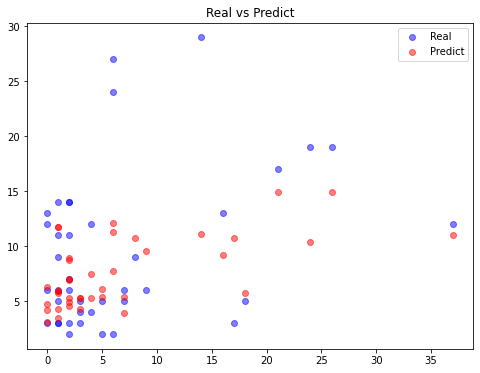

In [568]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test['ISM_Allocated'], y_test, color='blue', label='Real',    alpha=0.5)
plt.scatter(x_test['ISM_Allocated'], y_pred_xgb,  color='red' , label='Predict', alpha=0.5)
plt.title("Real vs Predict")
plt.legend(loc='best')
plt.show()

<Figure size 72x360 with 0 Axes>

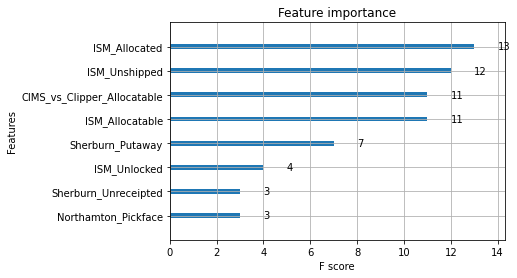

In [567]:
plt.figure(figsize=(1, 5))
xgb.plot_importance(xgb_reg, max_num_features=10)
plt.show()